In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from plotnine import (ggplot, 
                    aes, 
                    ggtitle, 
                    geom_bar, 
                    coord_flip, 
                    geom_text, 
                    geom_histogram,
                    geom_line,
                    geom_point,
                    geom_boxplot,
                    xlab,
                    ylab,
                    facet_grid,
                    facet_wrap,
                    geom_smooth,
                    geom_col,
                    geom_density,
                    after_stat,
                    xlim,
                    scale_x_datetime)
mpg = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/mpg.csv')
diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')
ts = pd.read_csv('datasets/random_walk_timeseries.csv')

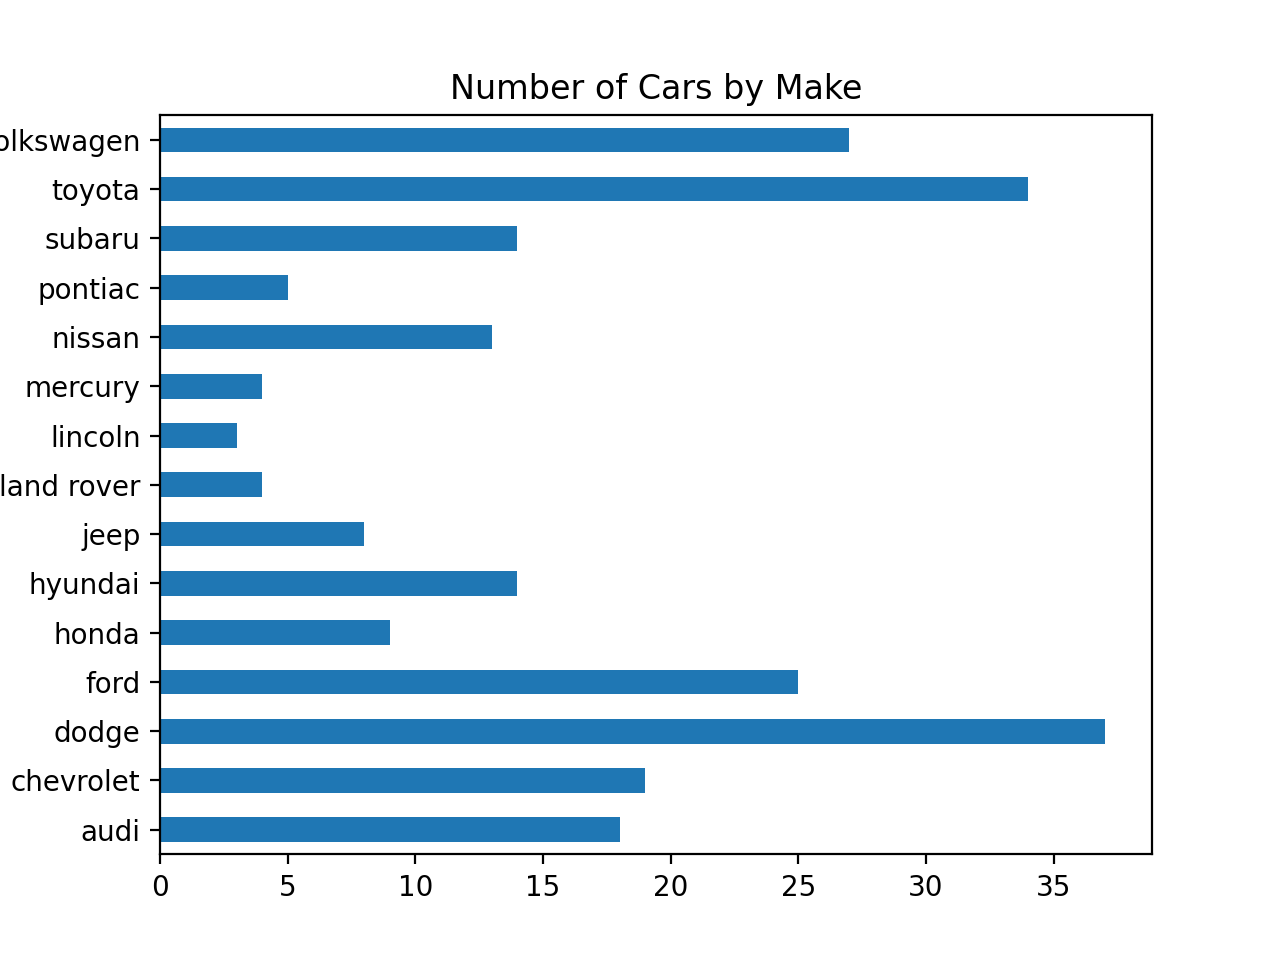

In [8]:
mpg['manufacturer'].value_counts(sort=False).plot.barh().set_title('Number of Cars by Make')
plt.savefig('images/bar_mpl.png')

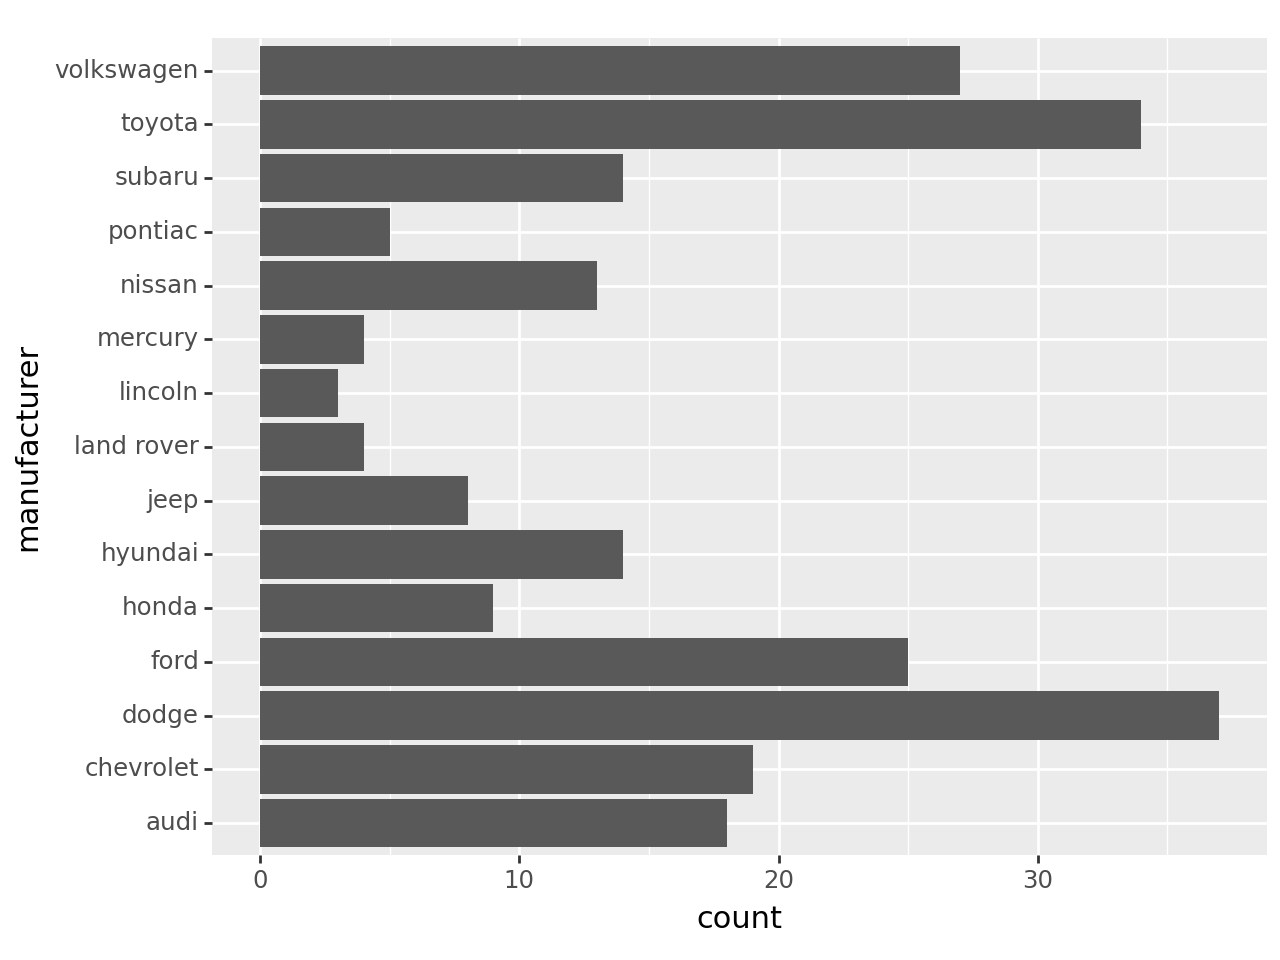

<Figure Size: (640 x 480)>

In [4]:
ggplot(mpg) + geom_bar(aes(x='manufacturer')) + coord_flip()
plt.savefig('images/bar_p9.png')

In [10]:
alt.Chart(mpg, title='Number of Cars by Make').mark_bar().encode(
    x='count()', y=alt.Y('manufacturer').title('Make')
)
plt.savefig('images/bar_altair.png')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Highway MPG')

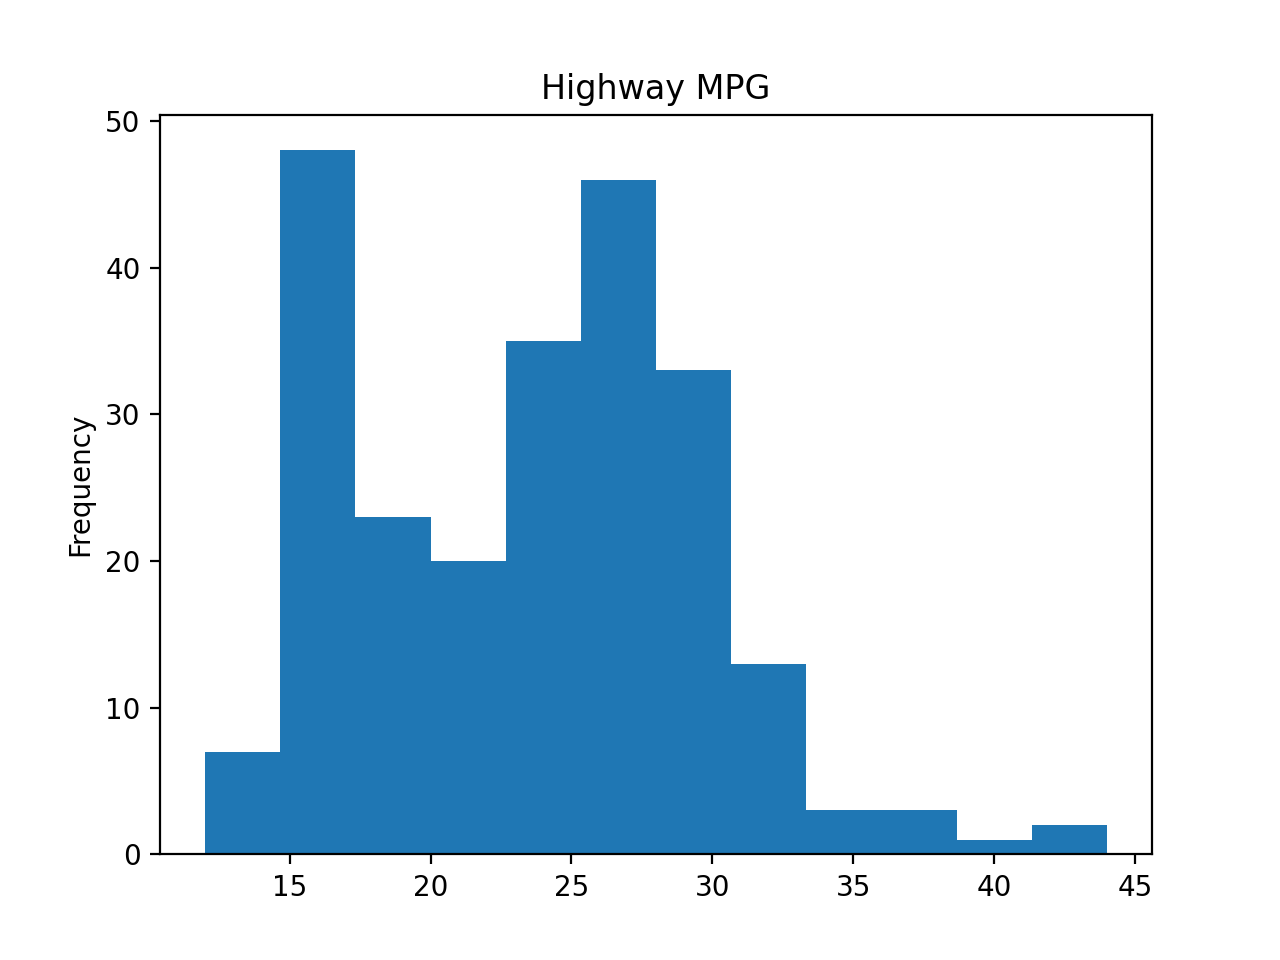

In [11]:
mpg['hwy'].plot.hist(bins=12).set_title('Highway MPG')
plt.savefig('images/hist_mpl.png')

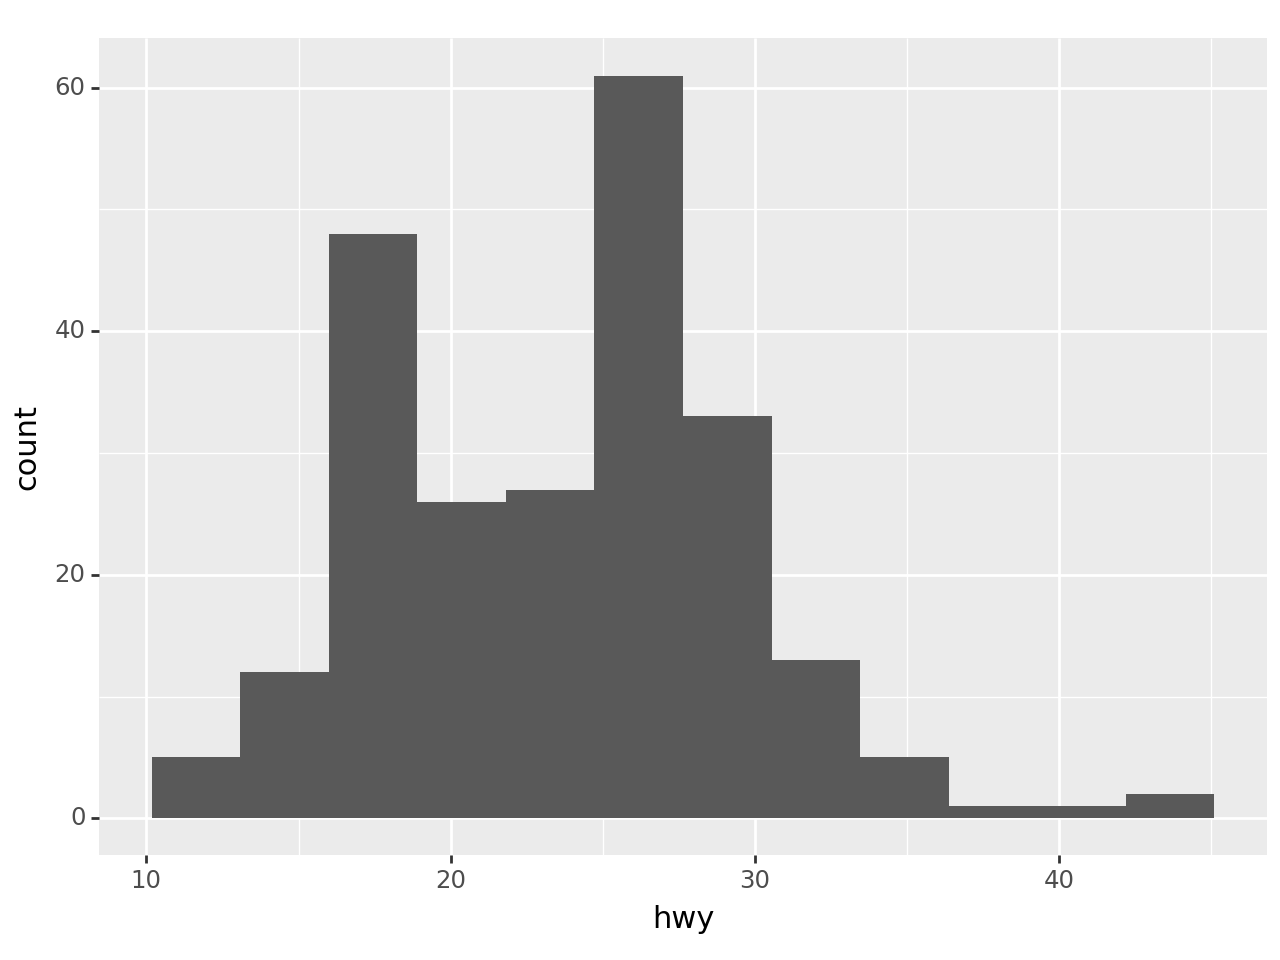

<Figure Size: (640 x 480)>

In [12]:
ggplot(mpg) + geom_histogram(aes(x='hwy'), bins=12)
plt.savefig('images/hist_p9.png')

In [13]:
alt.Chart(mpg, title='Highway MPG Frequencies').mark_bar().encode(
    x=alt.X('hwy', bin=alt.Bin(step=2)), y='count()'
)
plt.savefig('images/hist_altair.png')

alt.Chart(...)

[Text(0.5, 1.0, 'Engine Displacement in Litres vs Highway MPG'),
 Text(0.5, 0, 'Engine Displacement in Litres'),
 Text(0, 0.5, 'Highway MPG')]

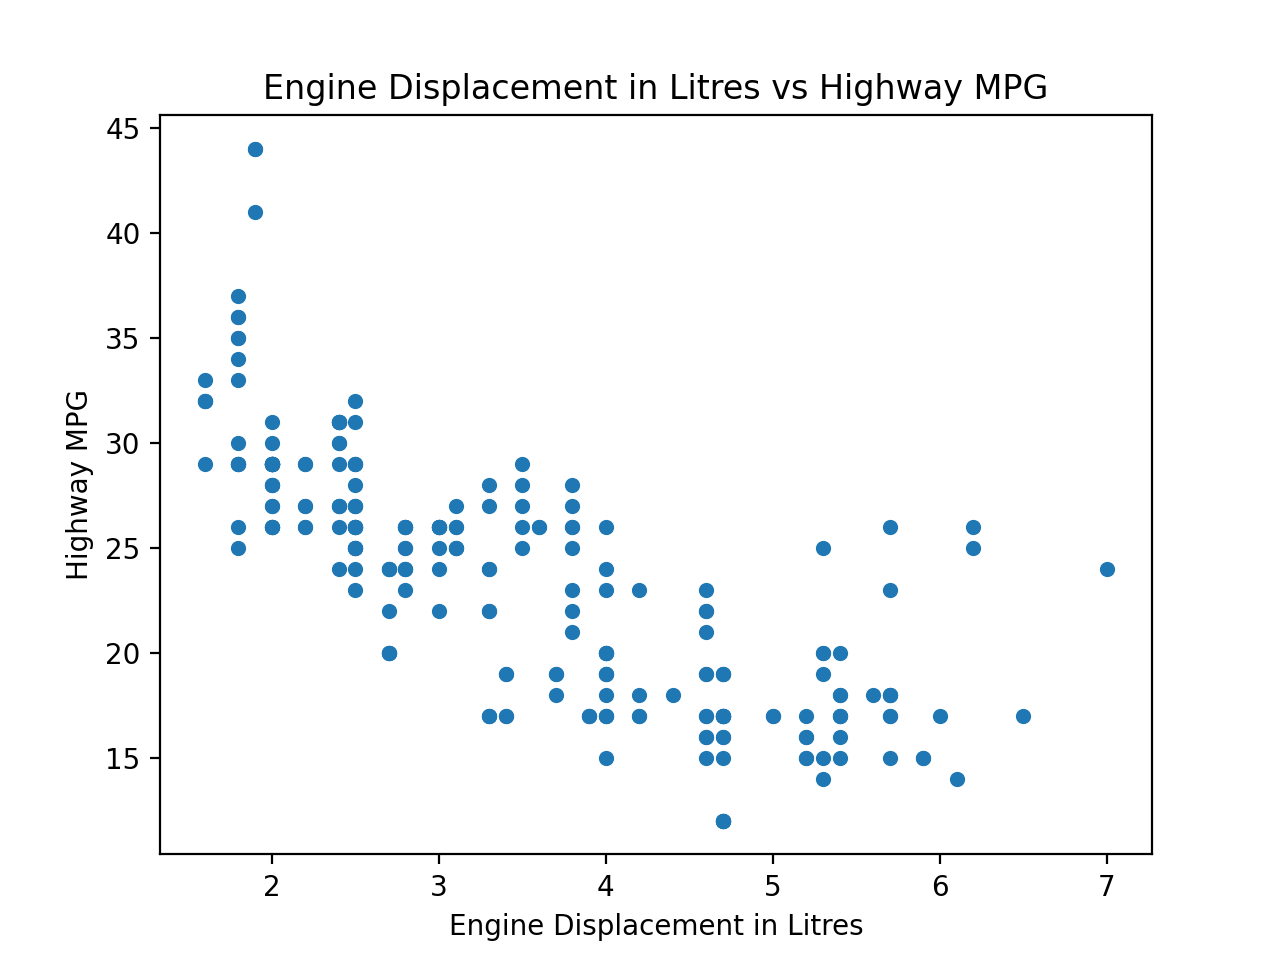

In [14]:
mpg.plot.scatter(x='displ', y='hwy').set(title='Engine Displacement in Litres vs Highway MPG',
                                        xlabel='Engine Displacement in Litres',
                                        ylabel='Highway MPG')
plt.savefig('images/scatter_mpl.png')

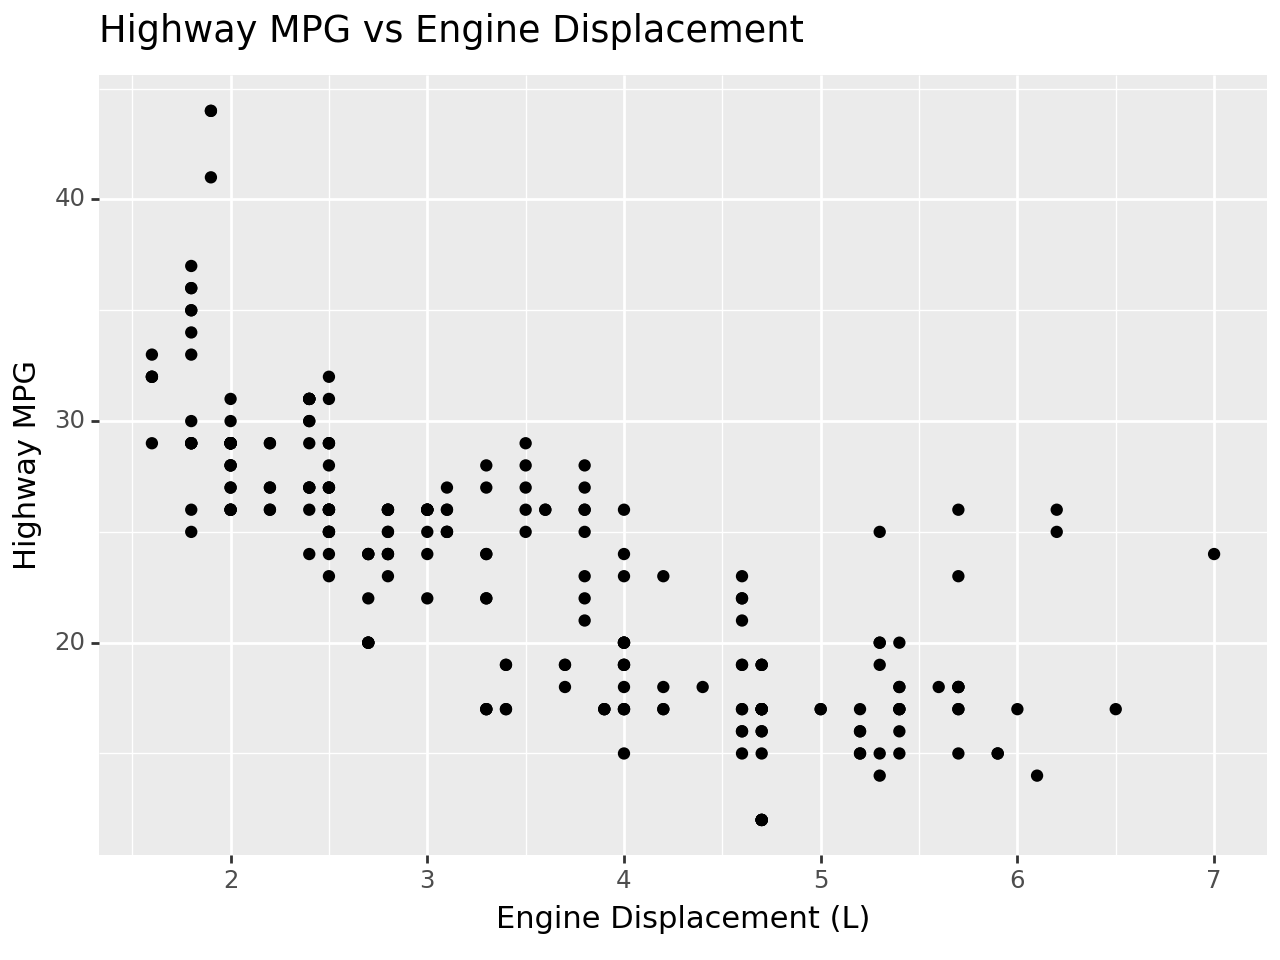

<Figure Size: (640 x 480)>

In [15]:
ggplot(mpg, aes(x='displ', y='hwy')) + \
geom_point() + \
ggtitle("Highway MPG vs Engine Displacement") + \
xlab("Engine Displacement (L)") + \
ylab("Highway MPG")
plt.savefig('images/scatter_p9.png')

In [16]:
alt.Chart(mpg, title='Highway MPG vs Engine Displacement').mark_circle(size=60).encode(
    x=alt.X('displ').title('Engine Displacement in Litres'),
    y=alt.Y('hwy').title('Highway MPG'),
)
plt.savefig('images/scatter_alt.png')

alt.Chart(...)

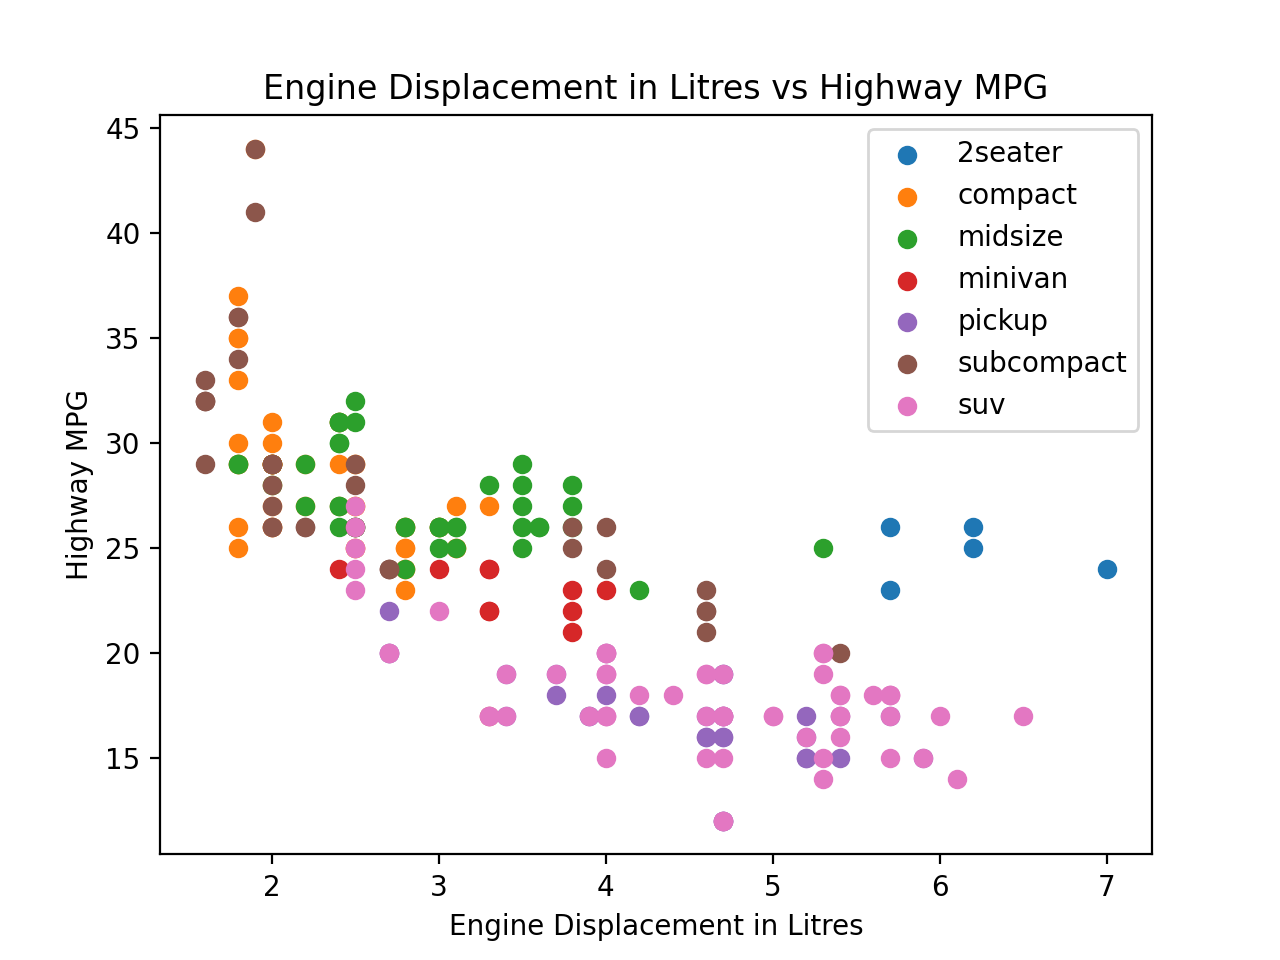

In [17]:
fig, ax = plt.subplots()

for c, df in mpg.groupby('class'):
    ax.scatter(df['displ'], df['hwy'], label=c)
ax.set(xlabel='Engine Displacement in Litres', ylabel='Highway MPG', title='Engine Displacement in Litres vs Highway MPG')
ax.legend()
plt.savefig('images/scatter_class_mpl.png')
plt.show()

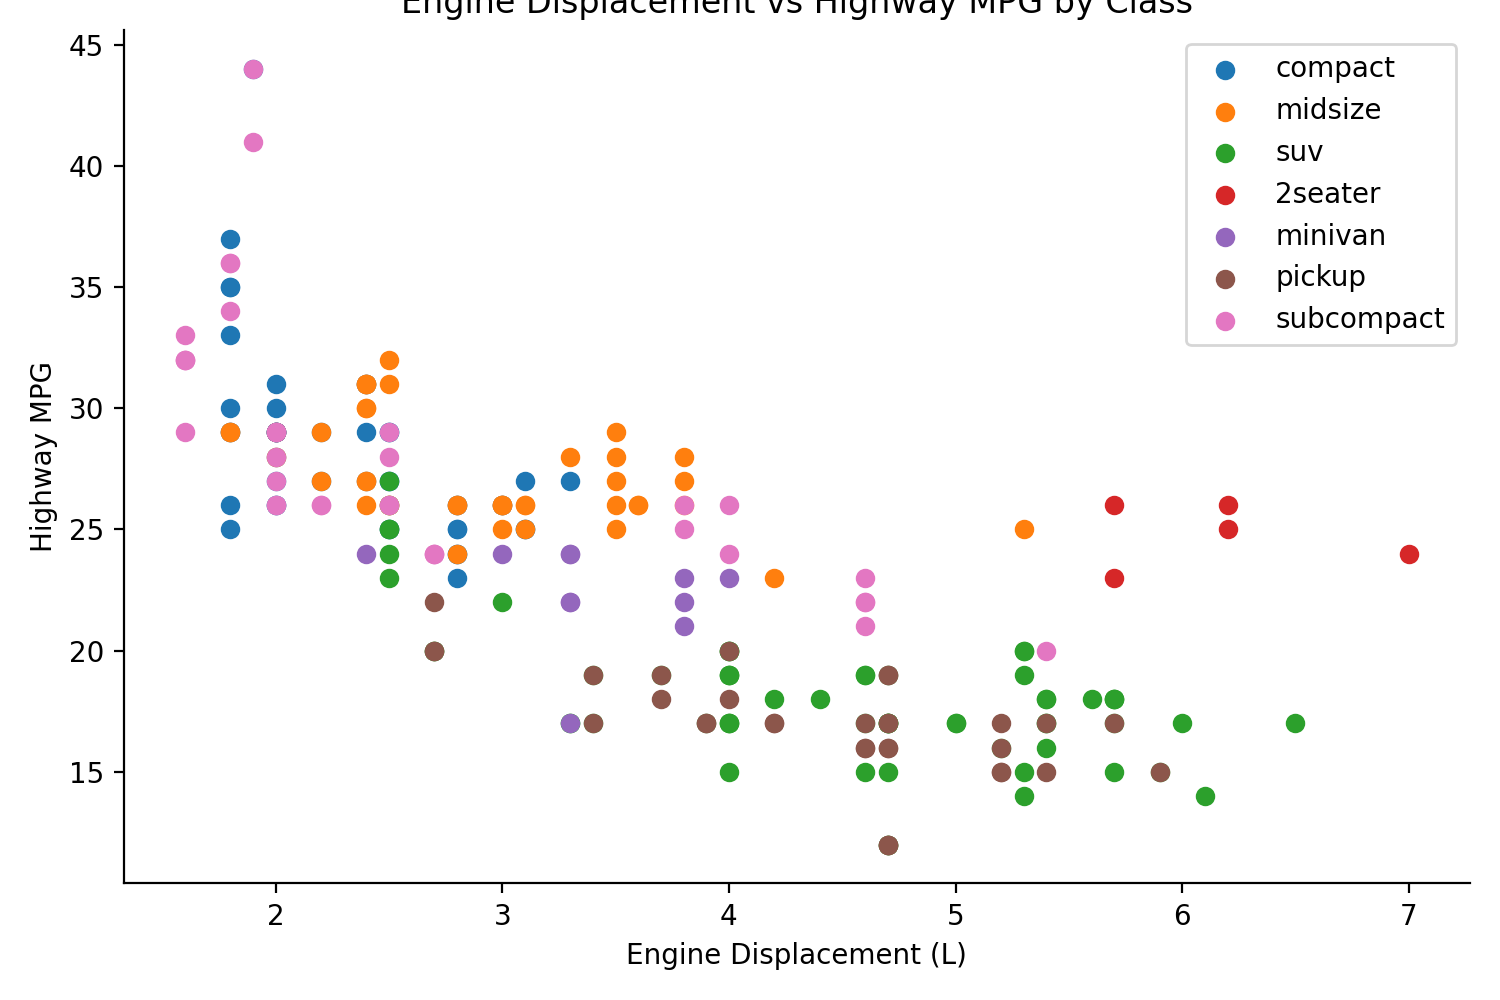

In [18]:
g = sns.FacetGrid(mpg, hue='class', height=5, aspect=1.5)
g.map(plt.scatter, 'displ', 'hwy')
g.ax.set(xlabel='Engine Displacement (L)',
         ylabel='Highway MPG',
         title='Engine Displacement vs Highway MPG by Class')
g.ax.legend()
plt.savefig('images/scatter_class_seaborn.png')

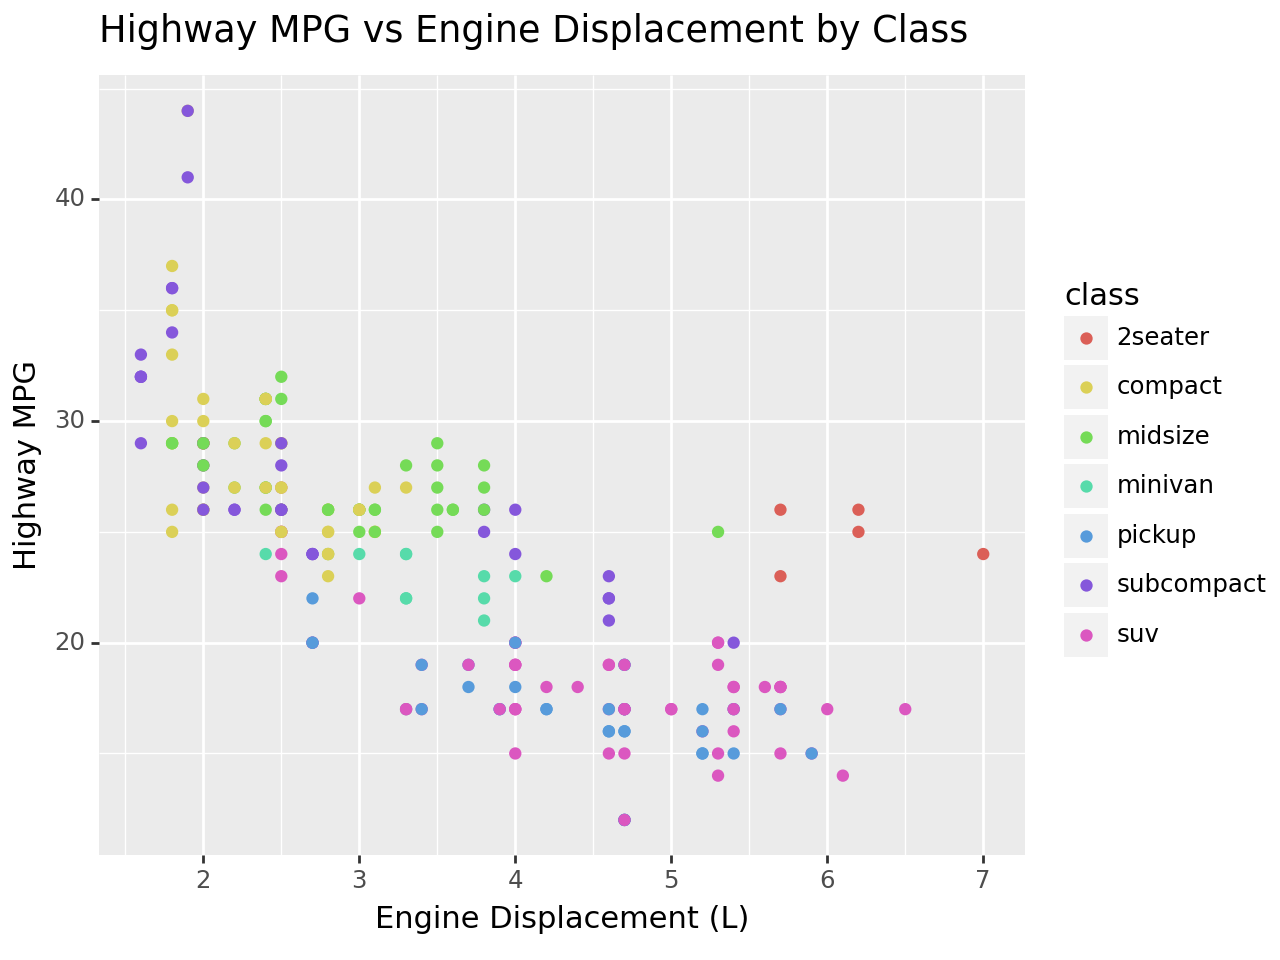

<Figure Size: (640 x 480)>

In [19]:
ggplot(mpg, aes(x='displ', y='hwy', color='class')) + \
geom_point() + \
ggtitle("Highway MPG vs Engine Displacement by Class") + \
xlab("Engine Displacement (L)") + \
ylab("Highway MPG")
plt.savefig('images/scatter_class_p9.png')

In [20]:
alt.Chart(mpg, title='Highway MPG vs Engine Displacement').mark_circle(size=60, opacity=0.5).encode(
    x=alt.X('displ').title('Engine Displacement in Litres'),
    y=alt.Y('hwy').title('Highway MPG'),
    color='class',
)
plt.savefig('images/scatter_class_altair.png')

alt.Chart(...)

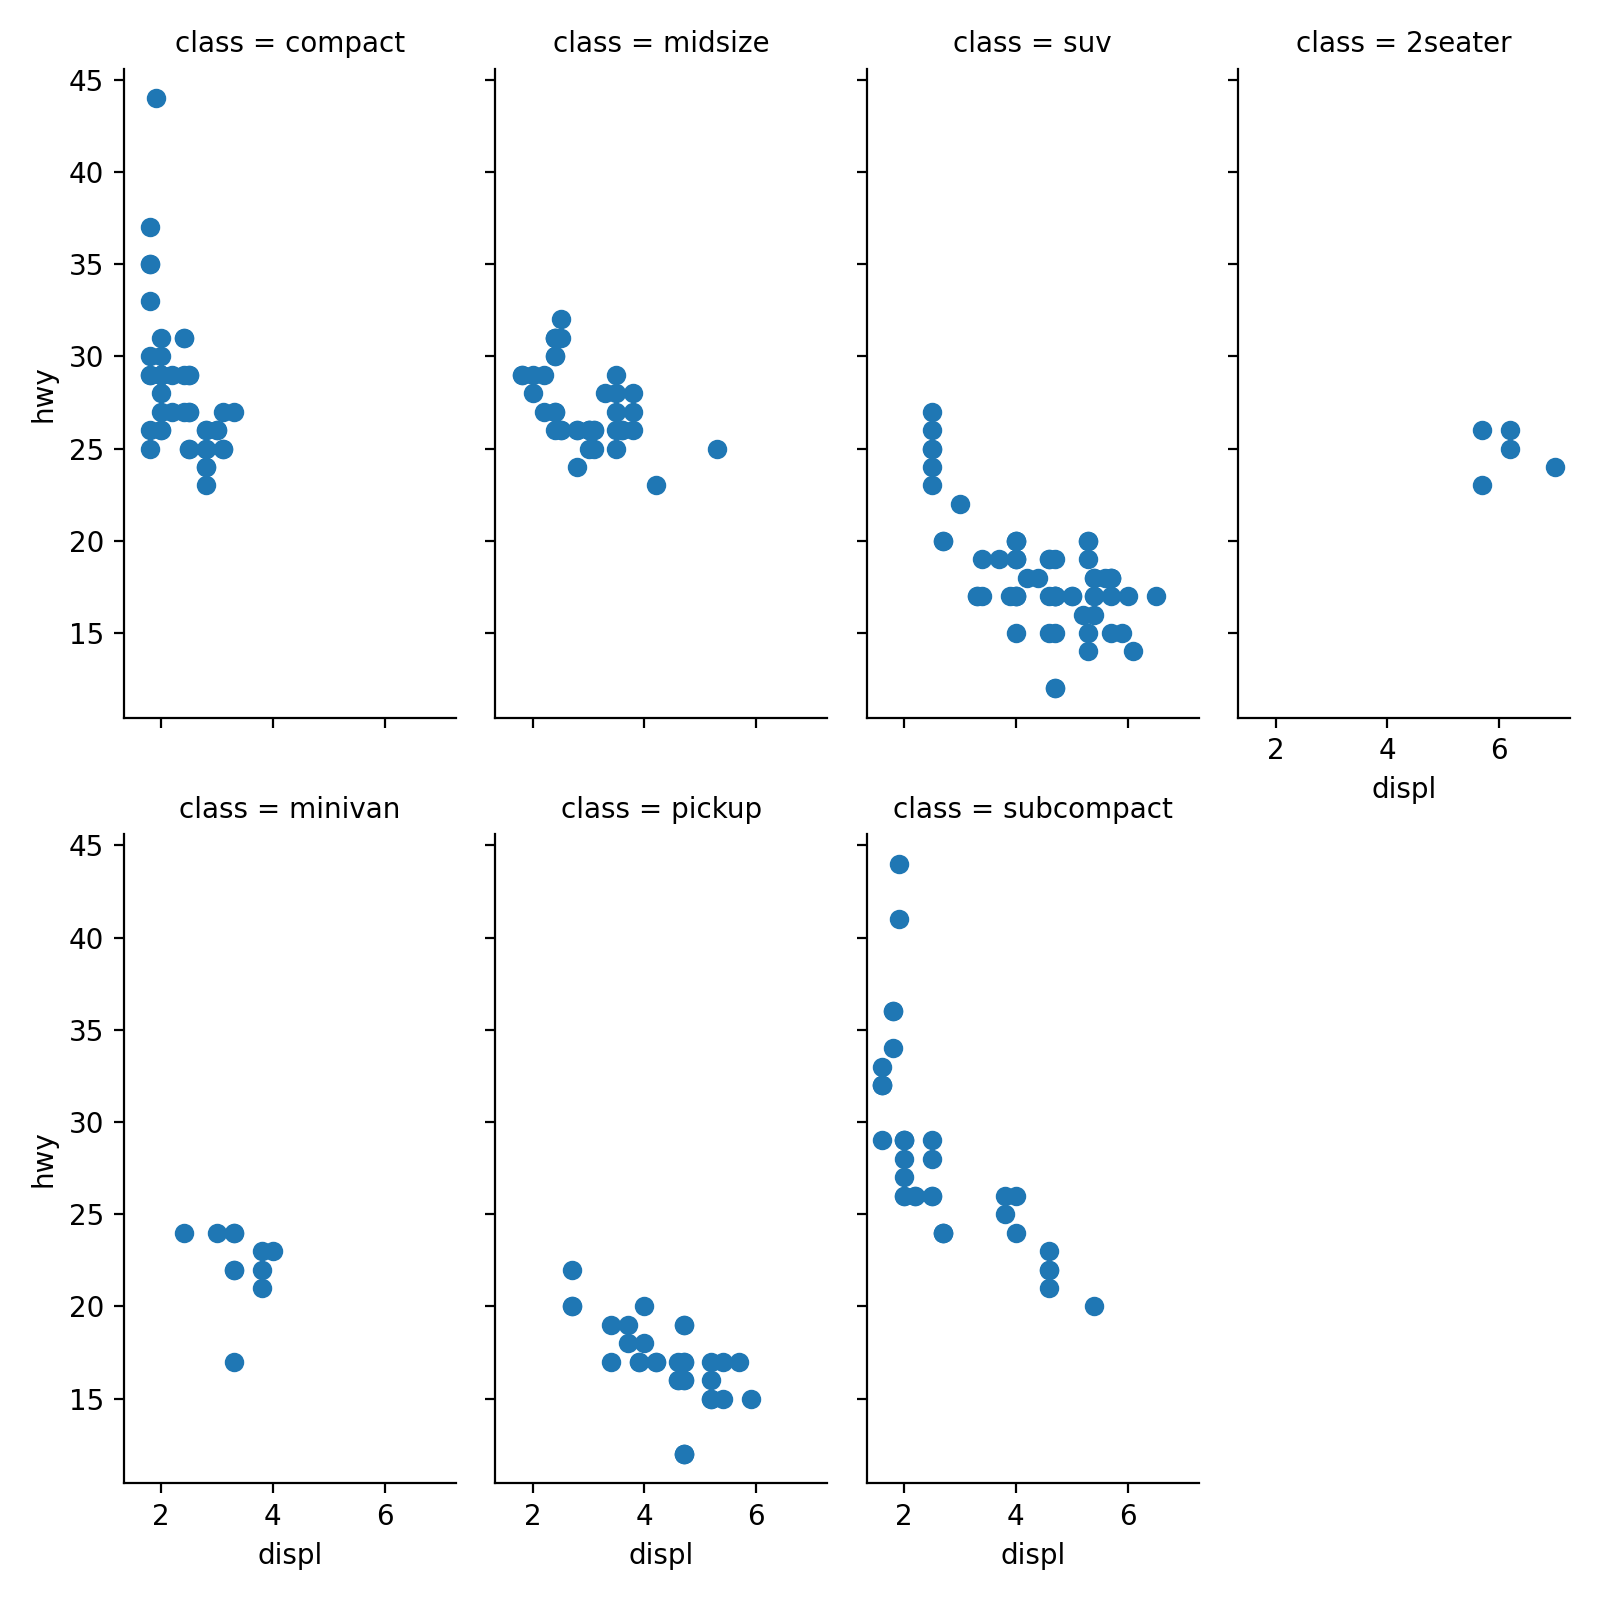

In [21]:
g = sns.FacetGrid(mpg, col='class', col_wrap=4, height=4, aspect=.5)
g.map(plt.scatter, 'displ', 'hwy')
plt.savefig('images/facet_scatter_seaborn.png')

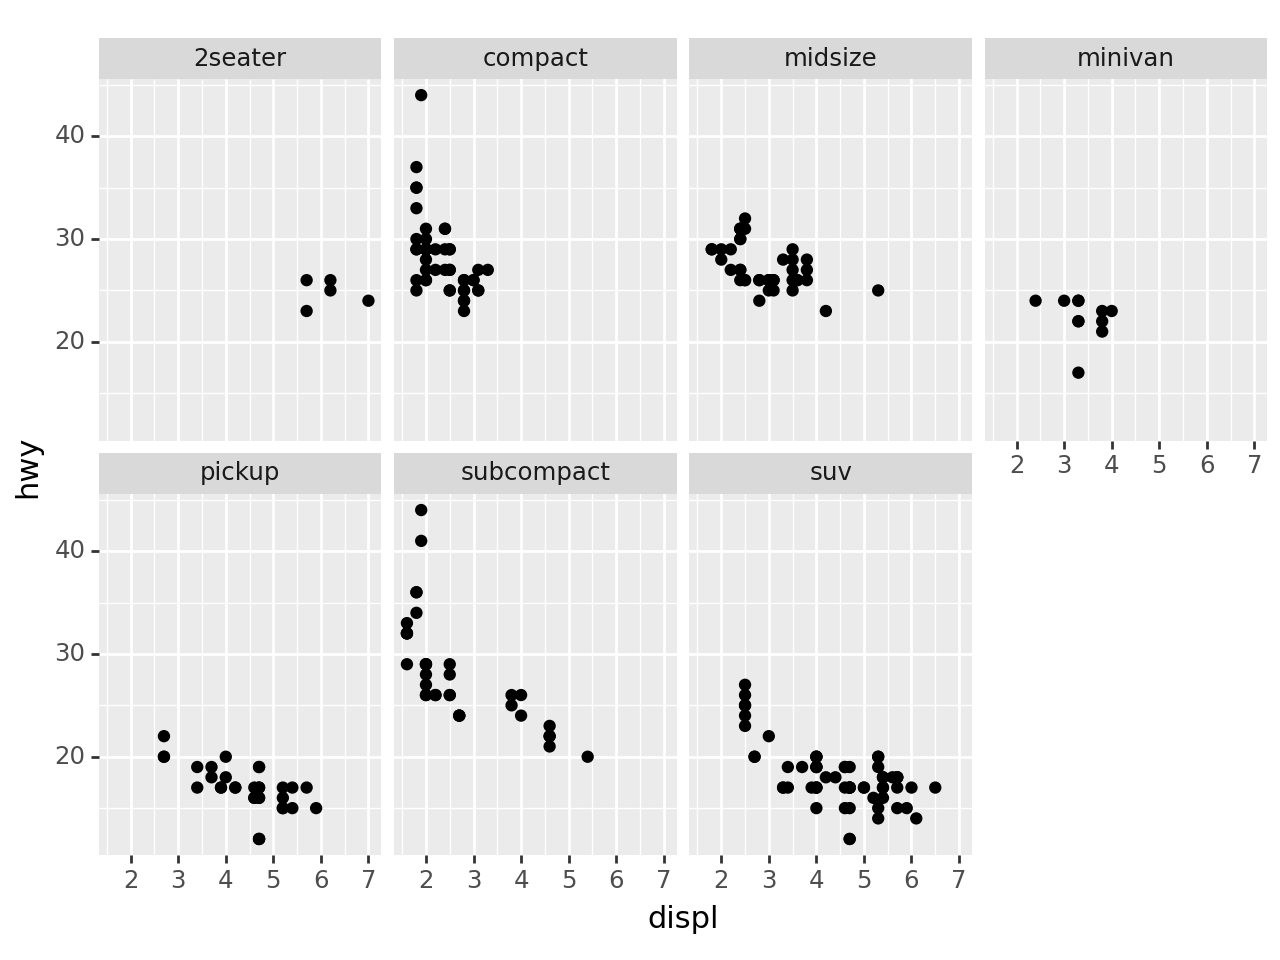

<Figure Size: (640 x 480)>

In [28]:
ggplot(mpg, aes(x='displ', y='hwy')) \
+ geom_point() \
+ facet_wrap(facets='~class', nrow=2)
plt.savefig('images/facet_scatter_p9.png')

In [22]:
alt.Chart(mpg).mark_circle(size=60).encode(
    x='displ',
    y='hwy',
    facet=alt.Facet("class:O", columns=4)
).properties(width=200, height=300)
plt.savefig('images/scatter_facet_altair.png')

alt.Chart(...)

[Text(0.5, 0, 'Engine Displacement in Litres'),
 Text(0, 0.5, 'Highway MPG'),
 Text(0.5, 1.0, 'Engine Displacement in Litres vs Highway MPG')]

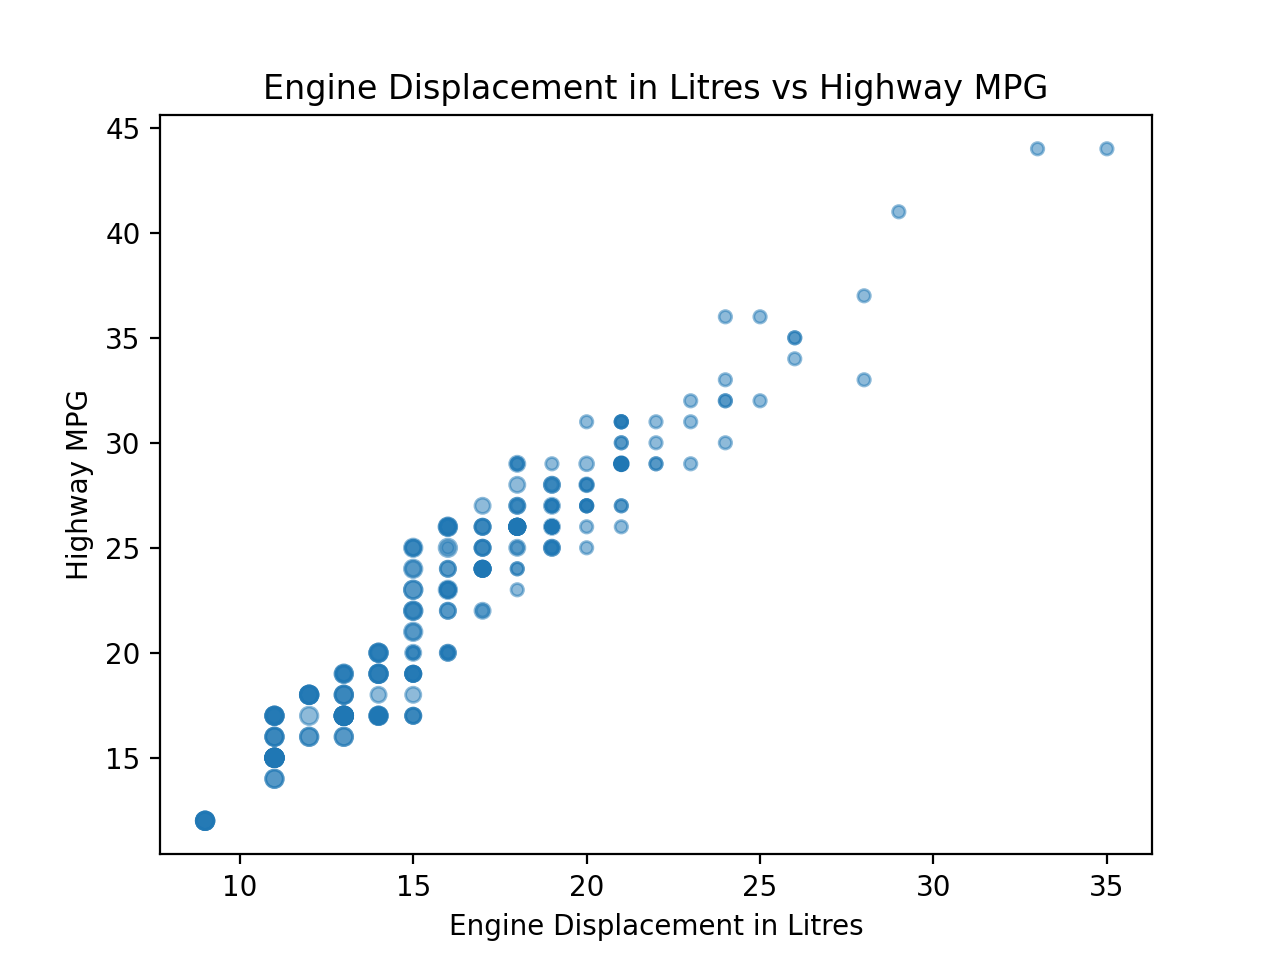

In [23]:
fig, ax = plt.subplots()

ax.scatter(mpg['cty'], mpg['hwy'], s=5*mpg['cyl'], alpha=0.5)
ax.set(xlabel='Engine Displacement in Litres', ylabel='Highway MPG', title='Engine Displacement in Litres vs Highway MPG')
plt.savefig('images/scatter_size_mpl.png')

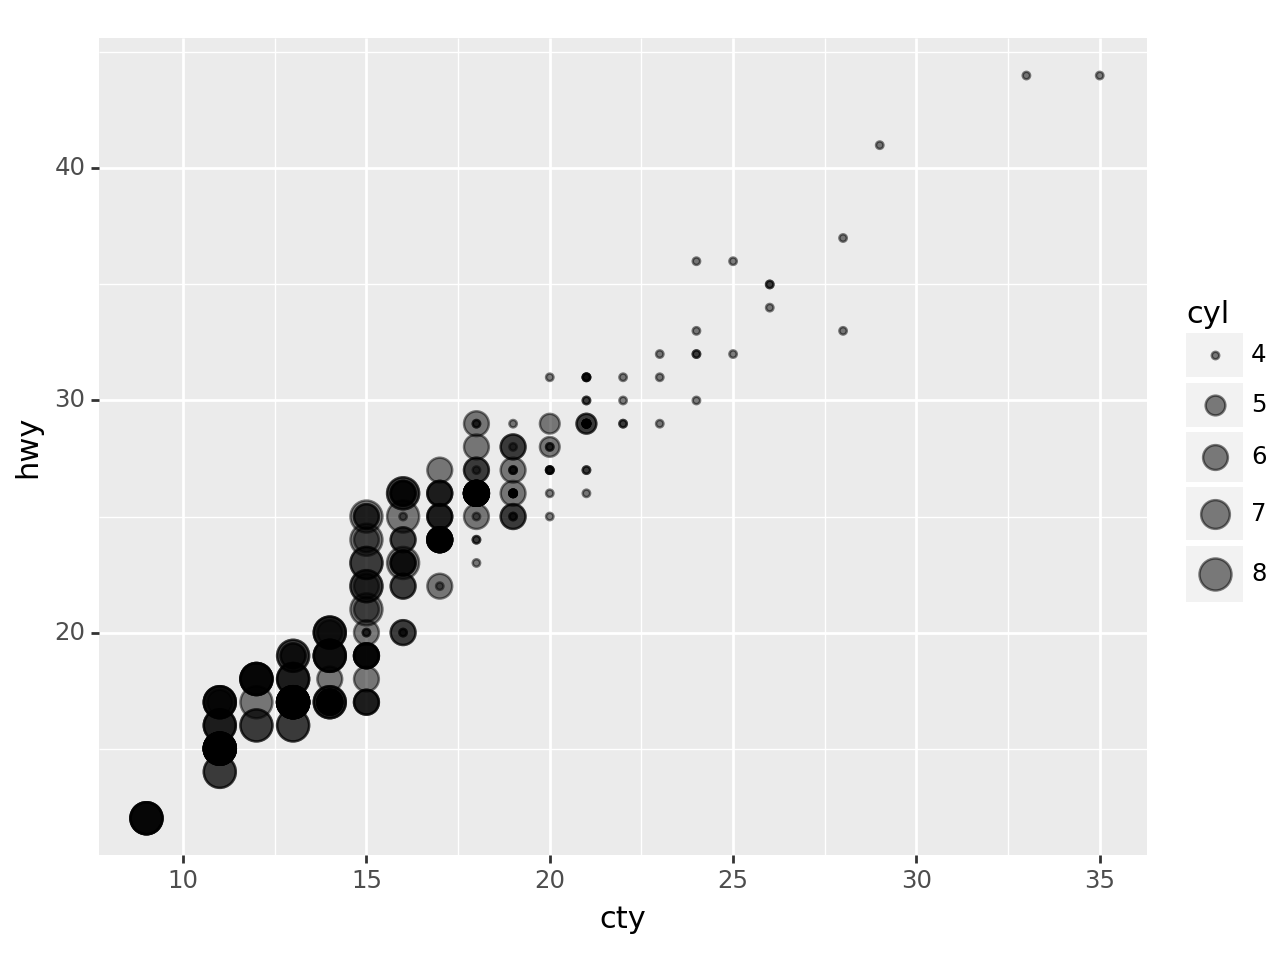

<Figure Size: (640 x 480)>

In [24]:
ggplot(mpg, aes(x='cty', y='hwy', size='cyl')) + \
geom_point(alpha=0.5)
plt.savefig('images/scatter_size_p9.png')

In [25]:
alt.Chart(mpg, title='City MPG vs Highway MPG').mark_circle(opacity=0.3).encode(
    x=alt.X('hwy').title('Highway MPG'),
    y=alt.Y('cty').title('City MPG'),
    size='displ'
)
plt.savefig('images/scatter_size_altair.png')

alt.Chart(...)

[Text(0.5, 29.00000000000003, 'Engine Displacement in Litres'),
 Text(33.37500000000001, 0.5, 'Highway MPG'),
 Text(0.5, 1.0, 'Highway MPG vs Engine Displacement in Litres')]

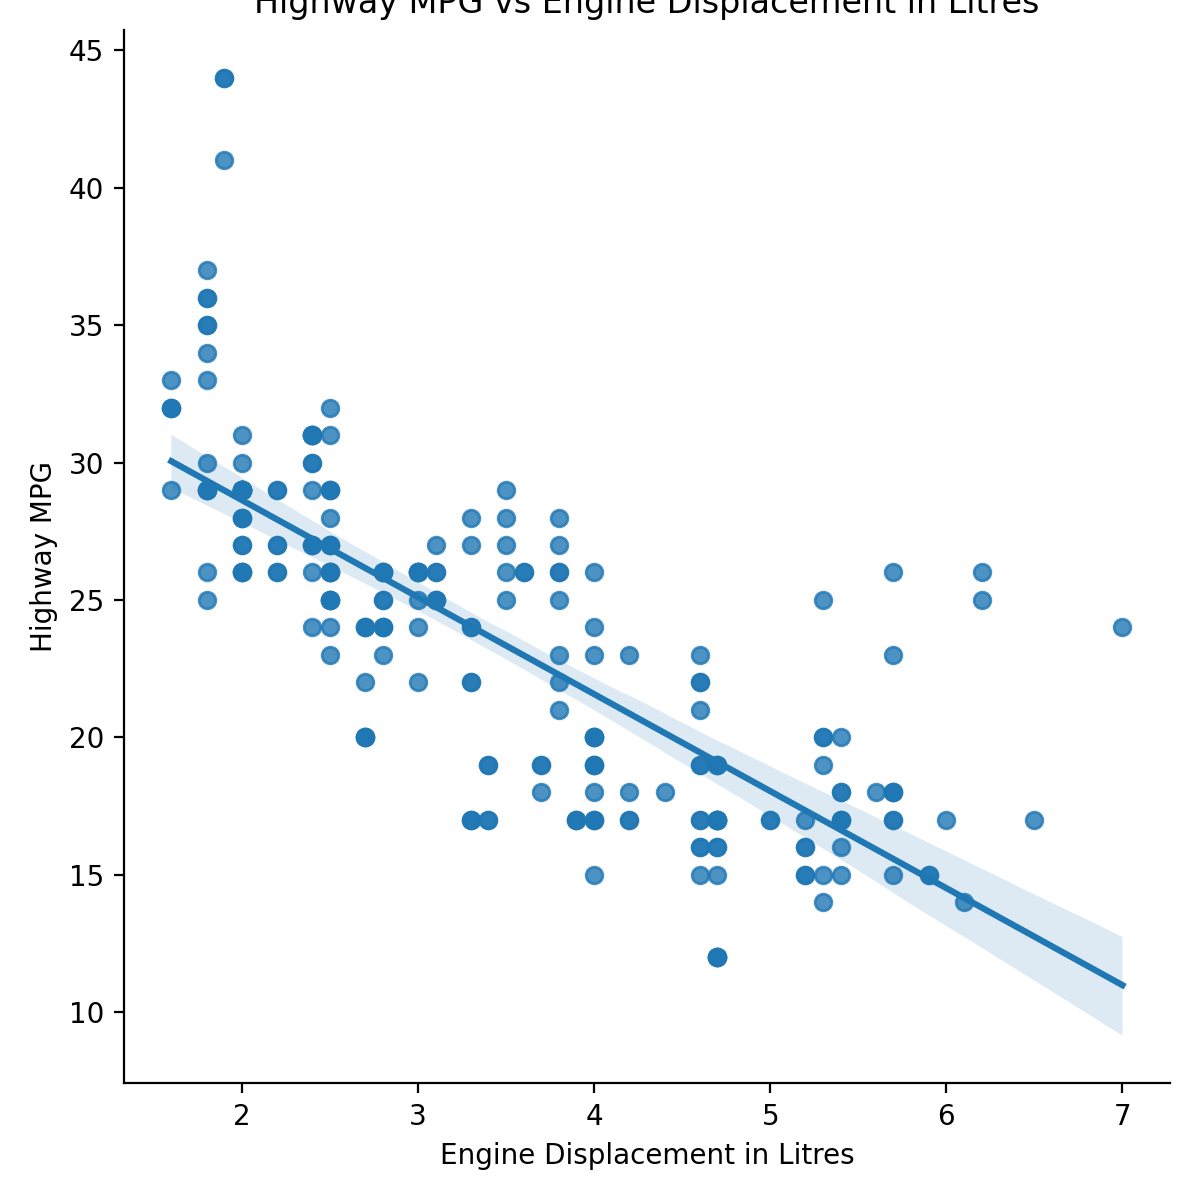

In [27]:
g = sns.lmplot(
    data=mpg, x='displ', y='hwy', height=6
)
g.ax.set(xlabel='Engine Displacement in Litres',
         ylabel='Highway MPG',
         title='Highway MPG vs Engine Displacement in Litres')
plt.savefig('images/scatter_line_conf_seaborn.png')

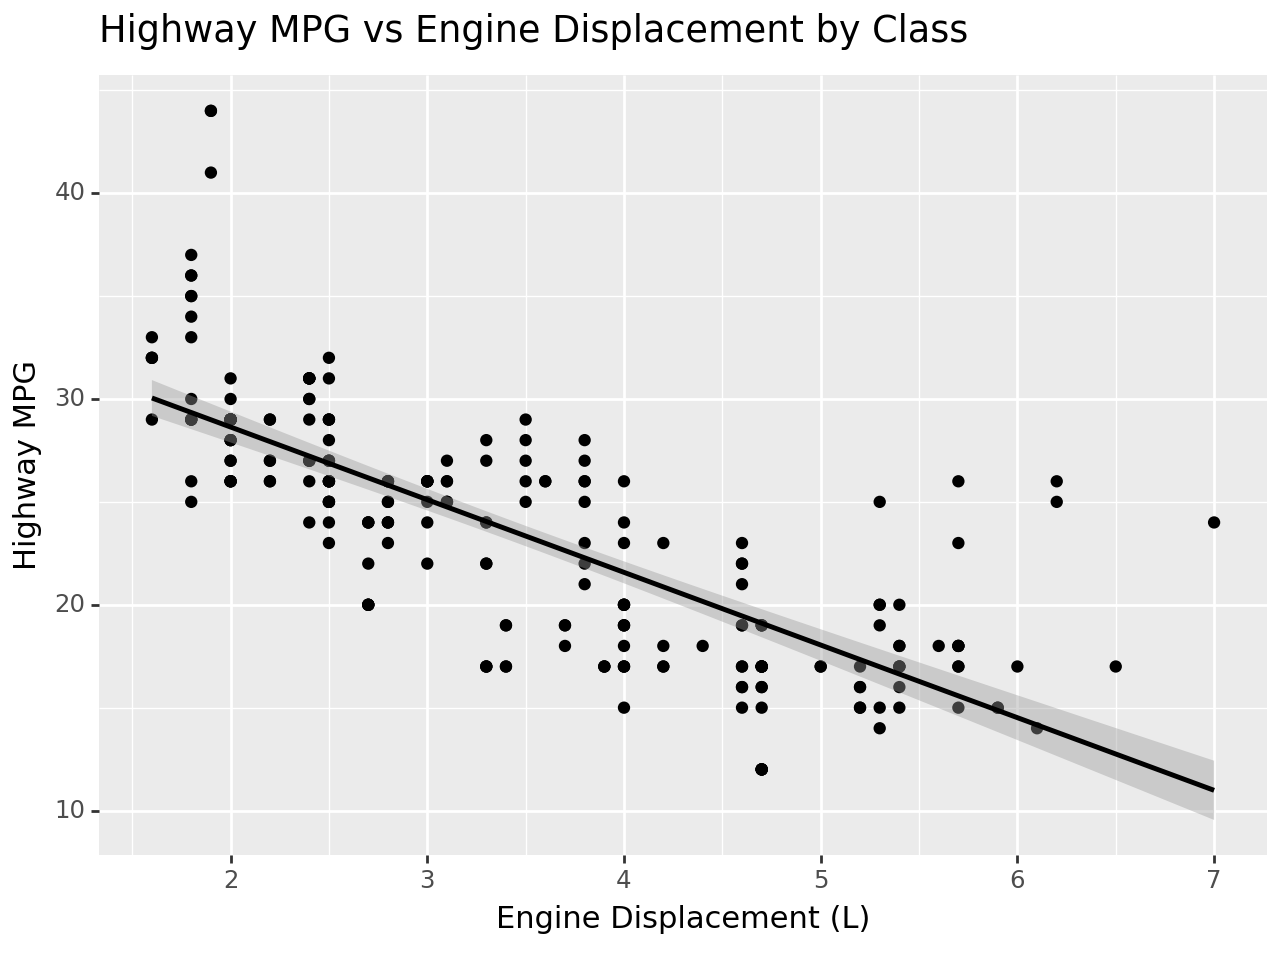

<Figure Size: (640 x 480)>

In [29]:
ggplot(mpg, aes(x='displ', y='hwy')) + \
geom_point() + \
geom_smooth(method='lm') + \
ggtitle("Highway MPG vs Engine Displacement by Class") + \
xlab("Engine Displacement (L)") + \
ylab("Highway MPG")
plt.savefig('images/scatter_line_conf_p9.png')

/home/atms/.local/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


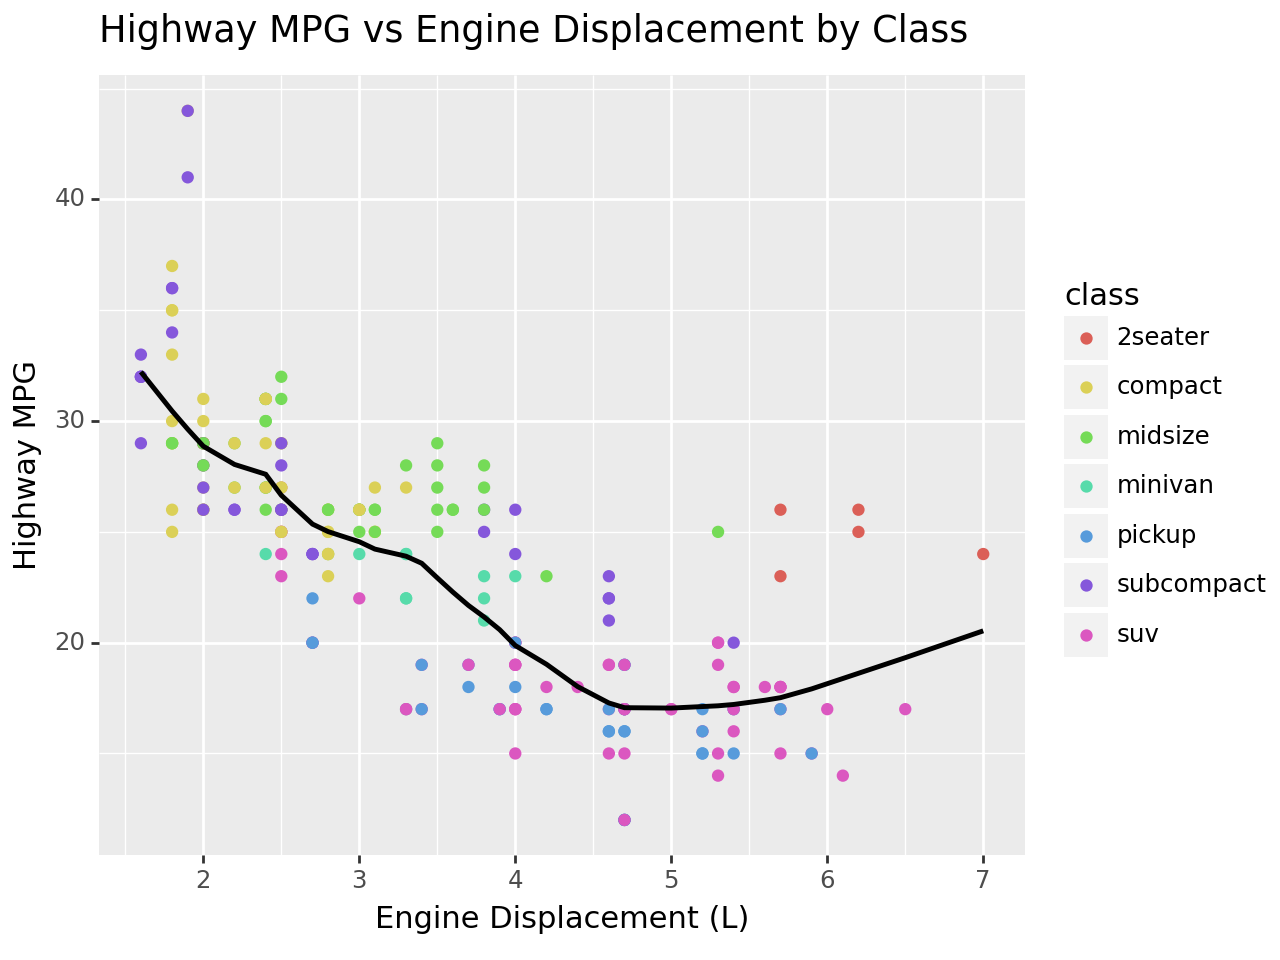

<Figure Size: (640 x 480)>

In [36]:
ggplot(mpg, aes(x='displ', y='hwy')) + \
geom_point(aes(color='class')) + \
geom_smooth(span=.3) + \
ggtitle("Highway MPG vs Engine Displacement by Class") + \
xlab("Engine Displacement (L)") + \
ylab("Highway MPG")
plt.savefig('images/scatter_loess_p9.png')

In [30]:
base = alt.Chart(mpg, title='Highway MPG vs Displacement').mark_circle().encode(
    x=alt.X('displ').title('Engine Displacement'),
    y=alt.Y('hwy').title('Highway MPG'),
    color='class'
)

base + base.transform_loess('displ', 'hwy').mark_line(size=4)
plt.savefig('images/scatter_loess_alt.png')

alt.LayerChart(...)

<Axes: xlabel='cut'>

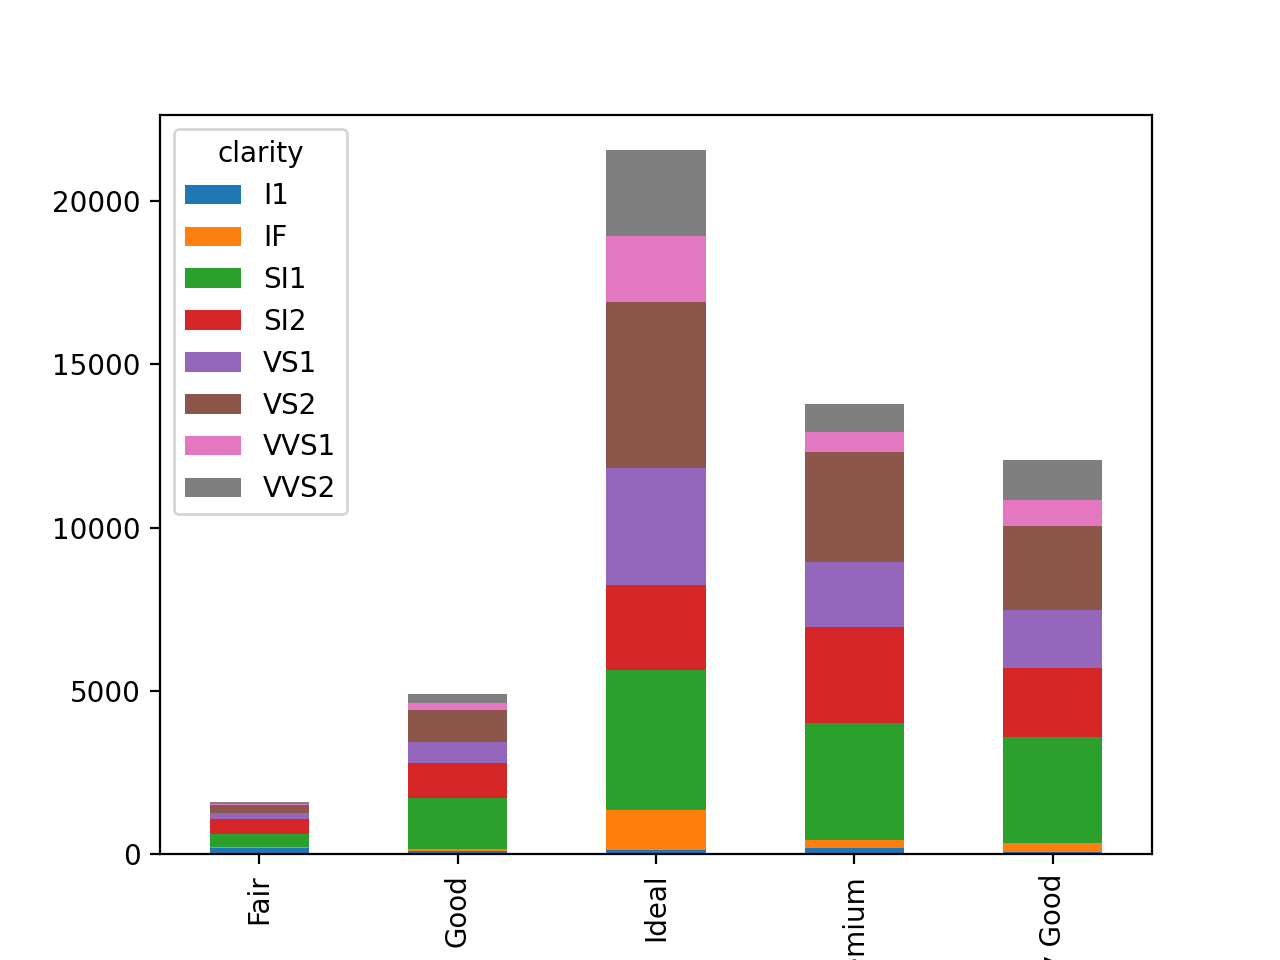

In [26]:
diamonds.groupby(['cut', 'clarity']).size().unstack().plot.bar(stacked=True)
plt.savefig('images/bar_stacked_mpl.png')

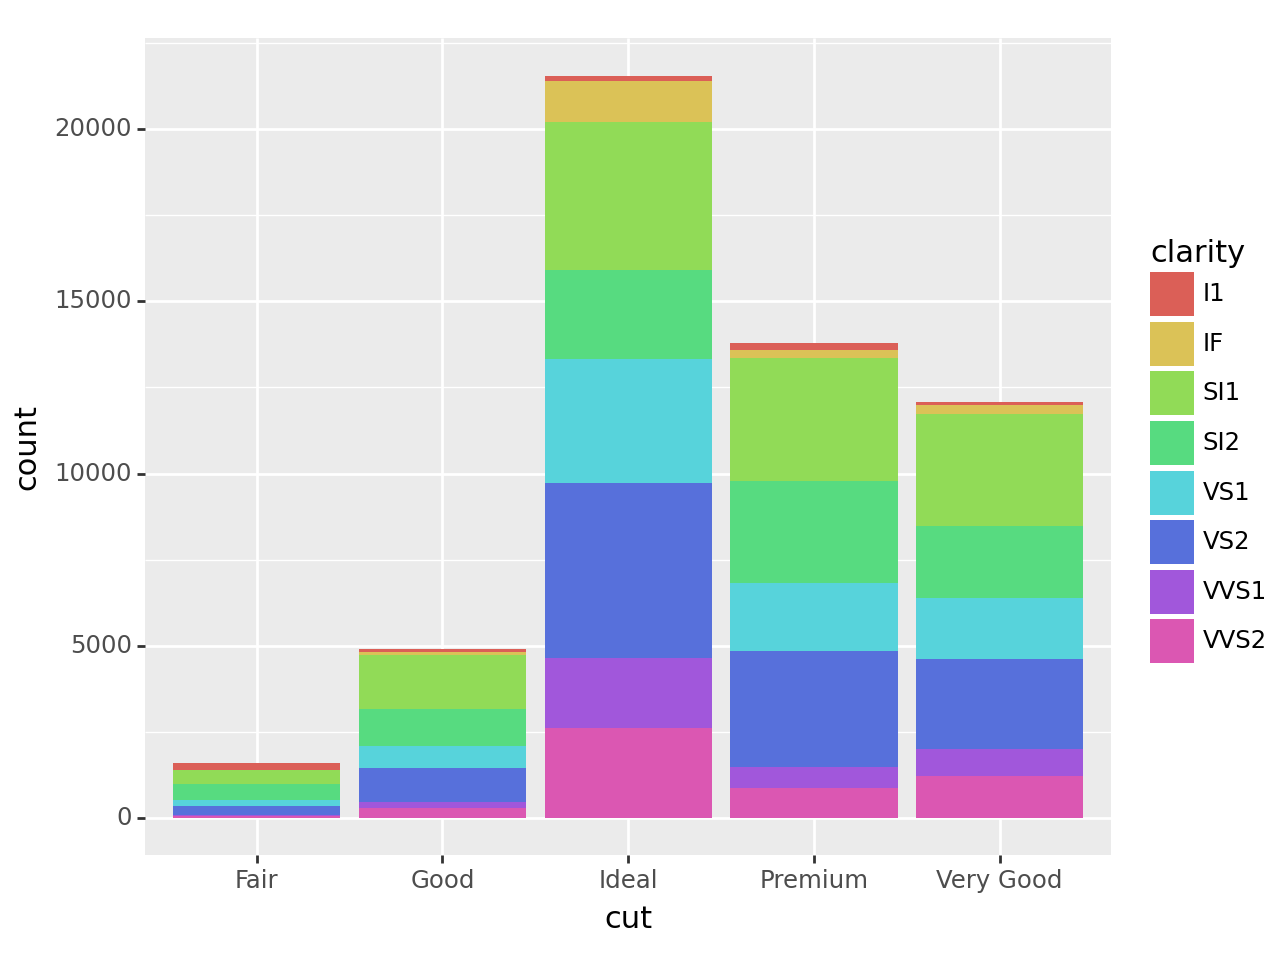

<Figure Size: (640 x 480)>

In [37]:
ggplot(diamonds, aes(x='cut', fill='clarity')) \
+ geom_bar()
plt.savefig('images/bar_stacked_p9.png')

In [39]:
# Altair can't handle size of diamond dataset
alt_diamonds = diamonds.head(5000)
alt.Chart(alt_diamonds).mark_bar().encode(
    x='cut',
    y='count()',
    fill='clarity'
).properties(width=300)
plt.savefig('images/bar_stacked_altair.png')

alt.Chart(...)

<Axes: xlabel='cut'>

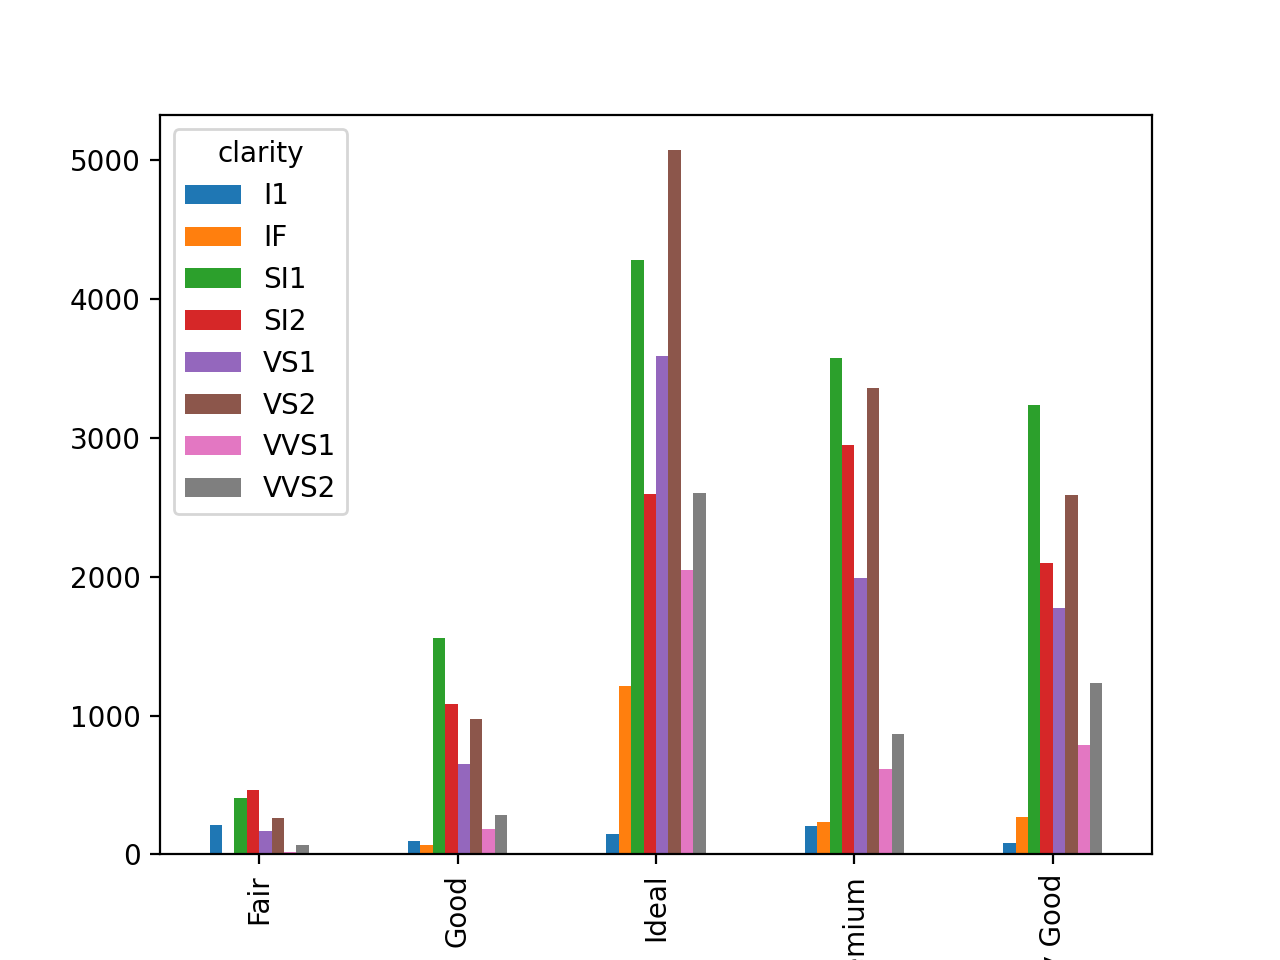

In [40]:
diamonds.groupby(['cut', 'clarity']).size().unstack().plot.bar()
plt.savefig('images/bar_dodged_mpl.png')

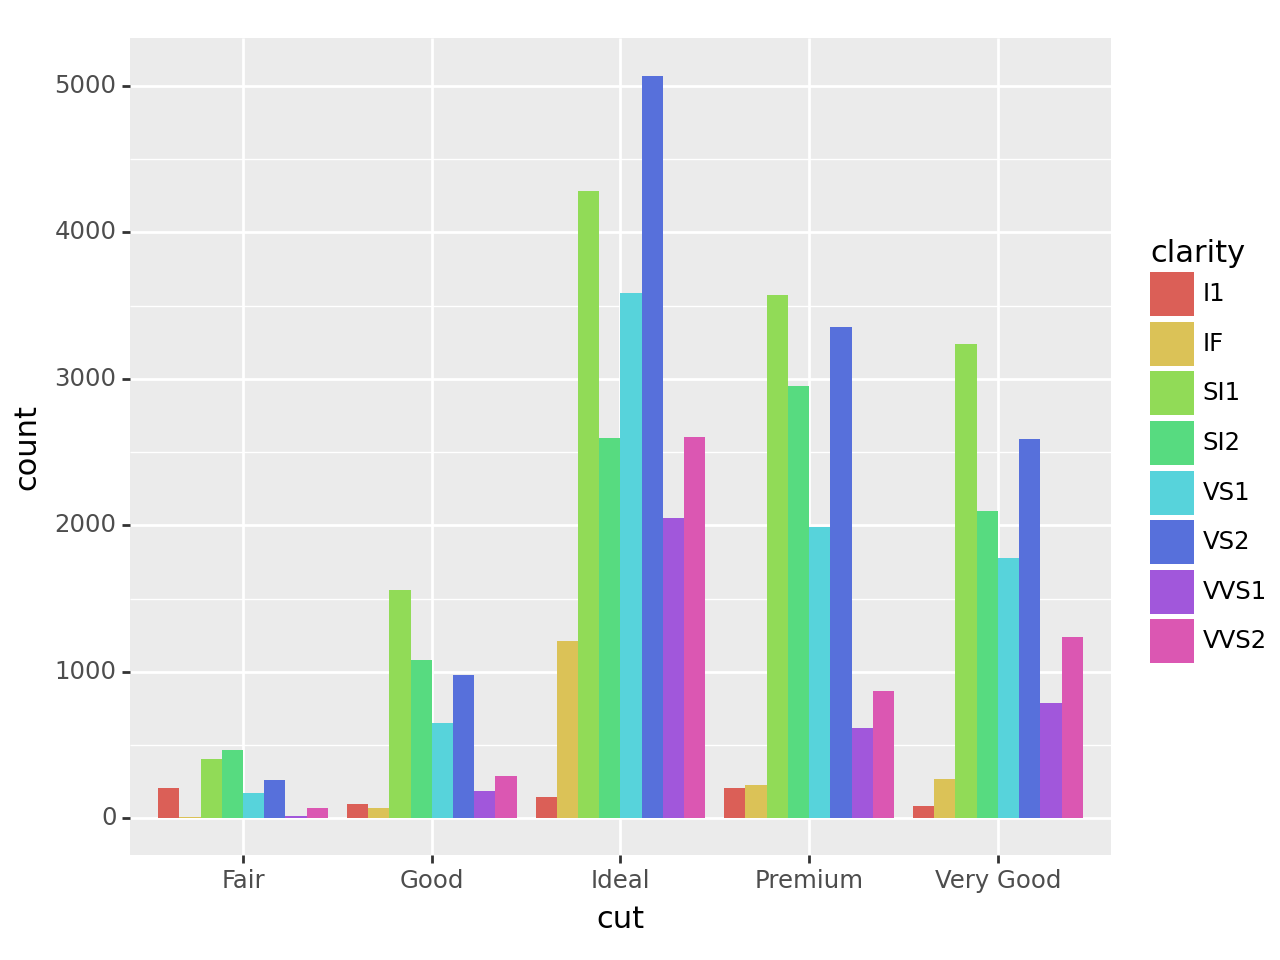

<Figure Size: (640 x 480)>

In [41]:
ggplot(diamonds, aes(x='cut', fill='clarity')) \
+ geom_bar(position='dodge')
plt.savefig('images/bar_dodged_p9.png')

In [43]:
alt.Chart(alt_diamonds).mark_bar().encode(
    x='clarity',
    y='count(cut)',
    fill='clarity',
    column='cut'
).properties(width=100)
plt.savefig('images/bar_dodged_altair.png')

alt.Chart(...)

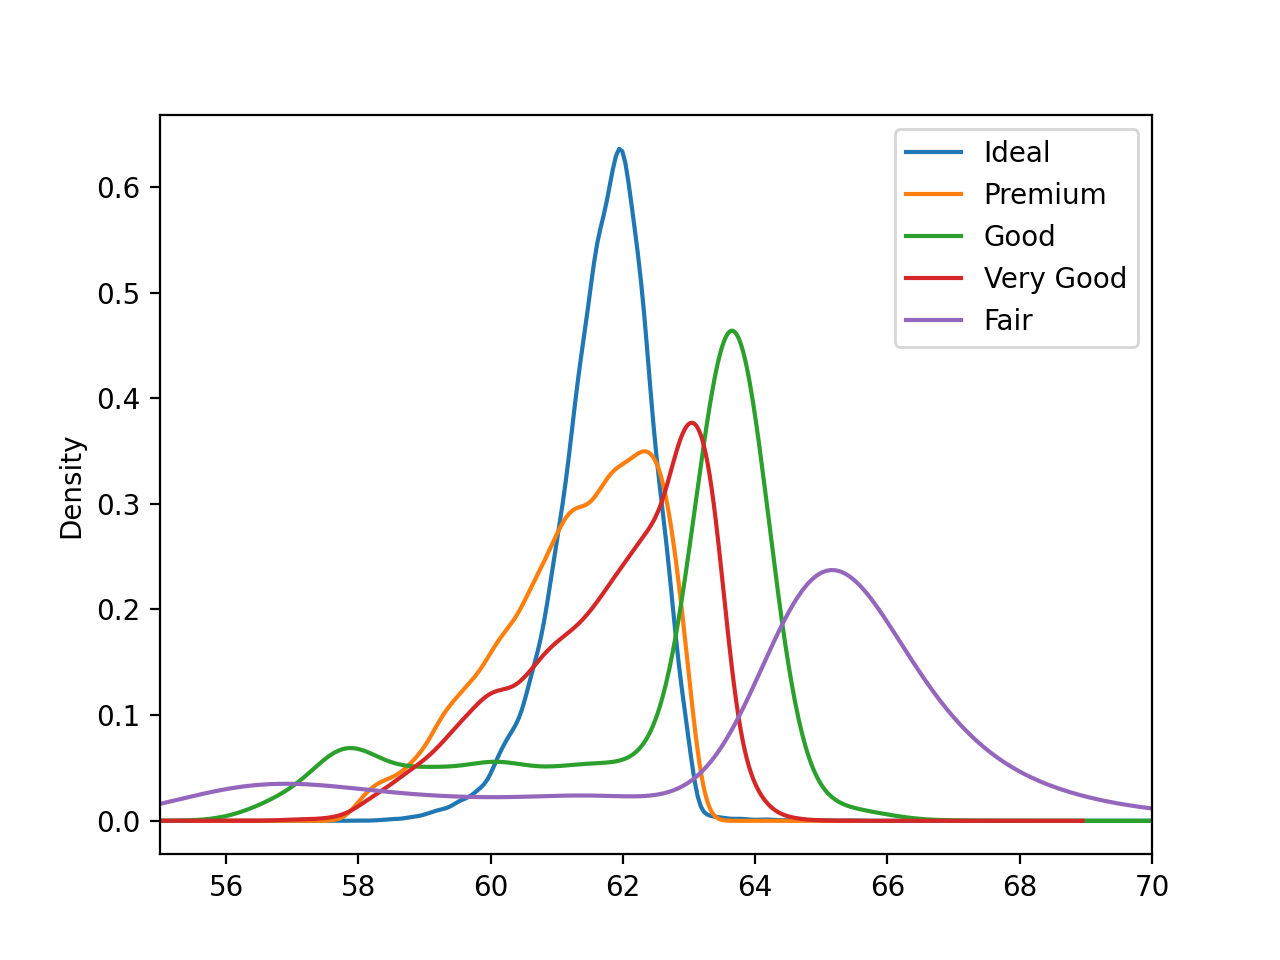

In [44]:
fig, ax = plt.subplots()
ax.set_xlim([55, 70])
for cut in diamonds['cut'].unique():
    s = diamonds[diamonds['cut'] == cut]['depth']
    s.plot.kde(ax=ax, label=cut)
ax.legend()
plt.savefig('images/kde_mpl.png')

[(55.0, 70.0)]

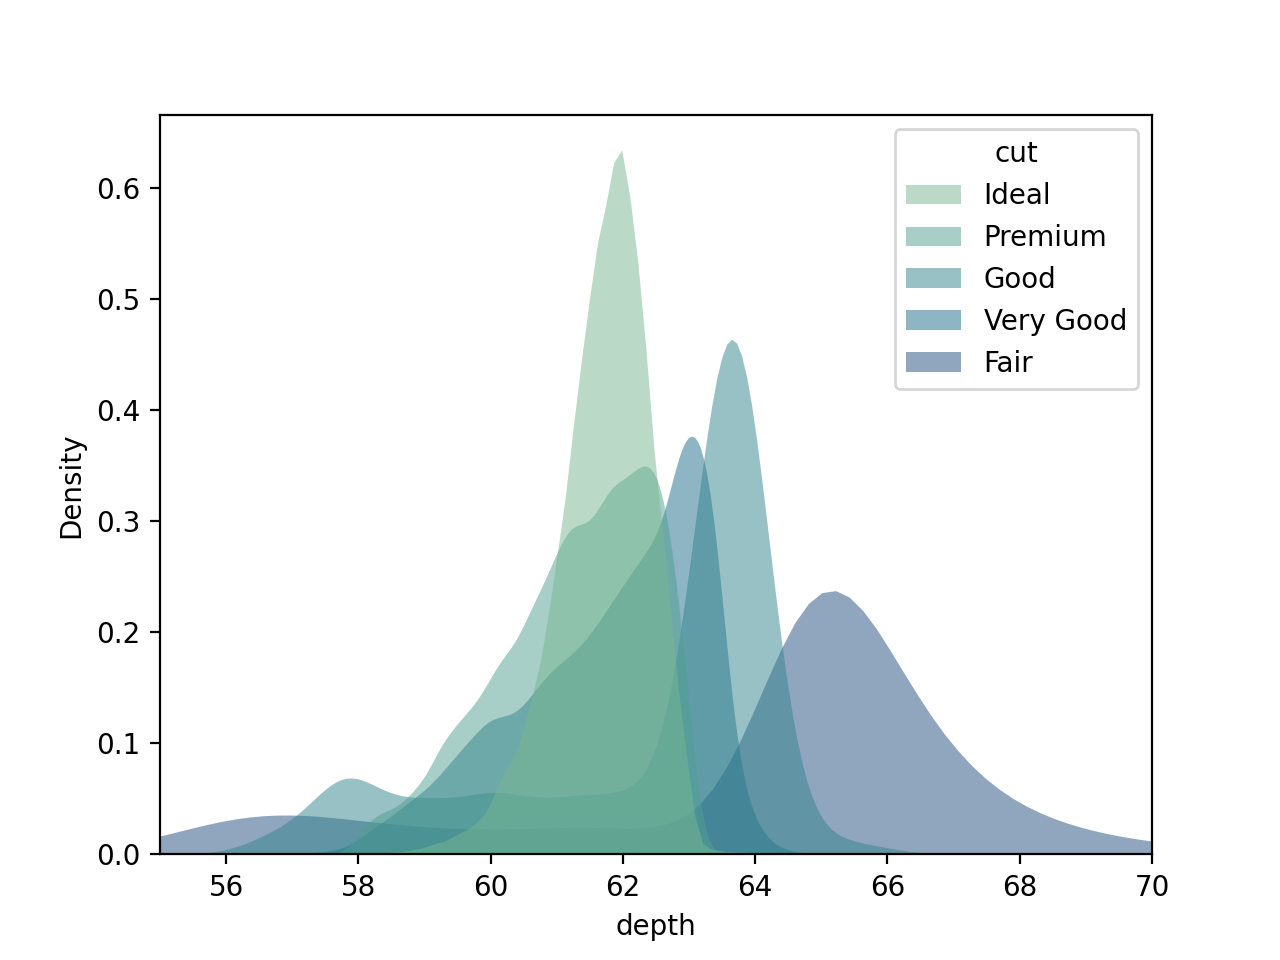

In [45]:
g = sns.kdeplot(
    data=diamonds, x='depth', hue='cut',
    fill=True, common_norm=False, palette='crest', alpha=0.5,
    linewidth=0
)
g.set(xlim=[55, 70])
plt.savefig('images/kde_seaborn.png')

/home/atms/.local/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 45 rows containing non-finite values.


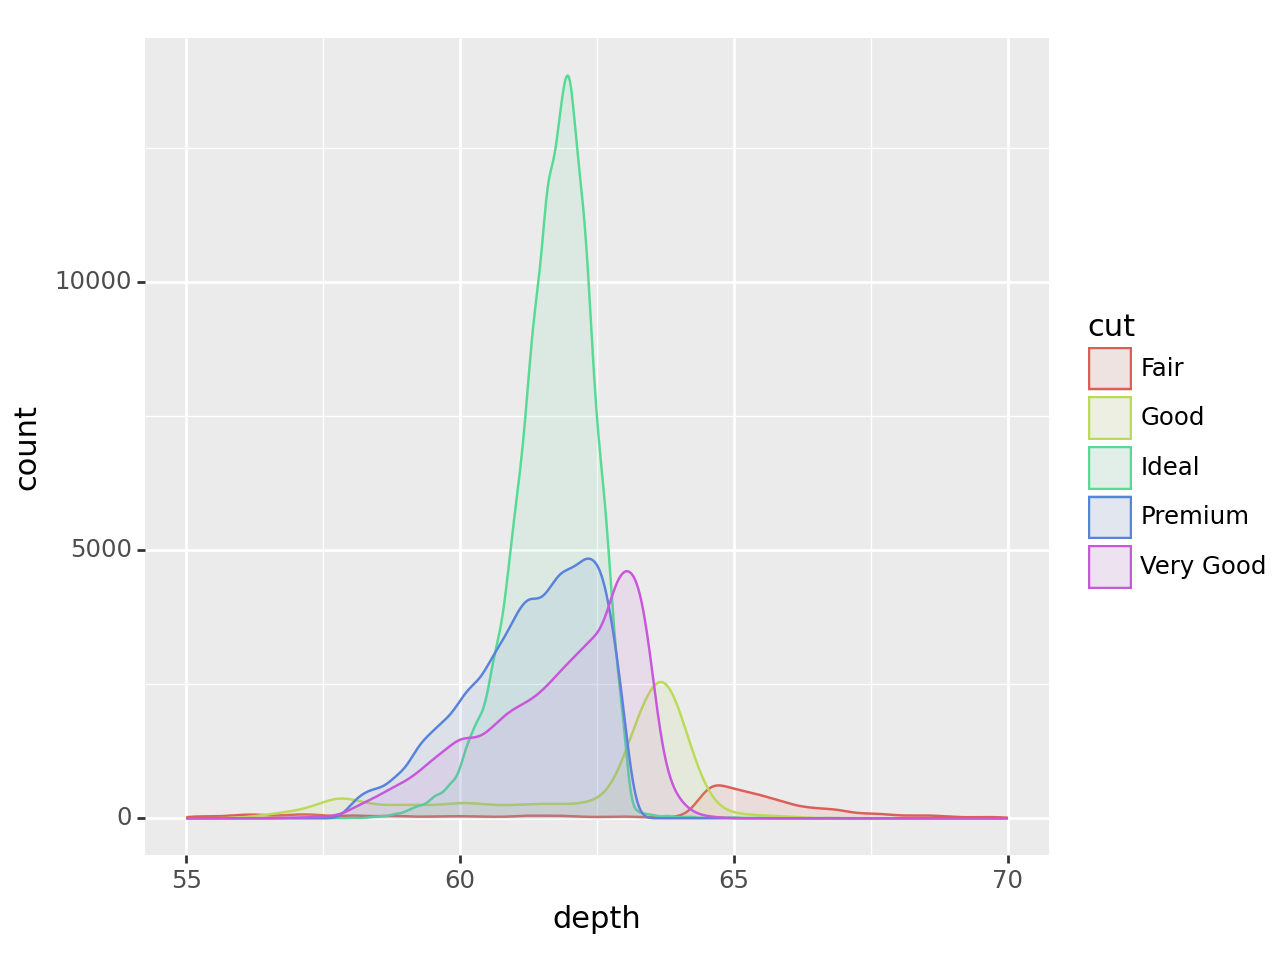

<Figure Size: (640 x 480)>

In [46]:
ggplot(diamonds, aes(x='depth', color='cut', fill='cut')) \
+ geom_density(aes(y=after_stat('count')), alpha=0.1) \
+ xlim([55, 70])
plt.savefig('images/kde_p9.png')

In [47]:
alt.Chart(alt_diamonds).transform_density(
    density='depth',
    as_=['depth', 'density'],
    groupby=['cut'],
    extent=[55, 70],
).mark_area(fillOpacity=0.3).encode(
    x='depth',
    y='density:Q',
    color='cut',
    stroke='cut'
)
plt.savefig('images/kde_altair.png')

alt.Chart(...)

In [50]:
ts['time'] = pd.to_datetime(ts['time'], format='%Y-%m-%d')

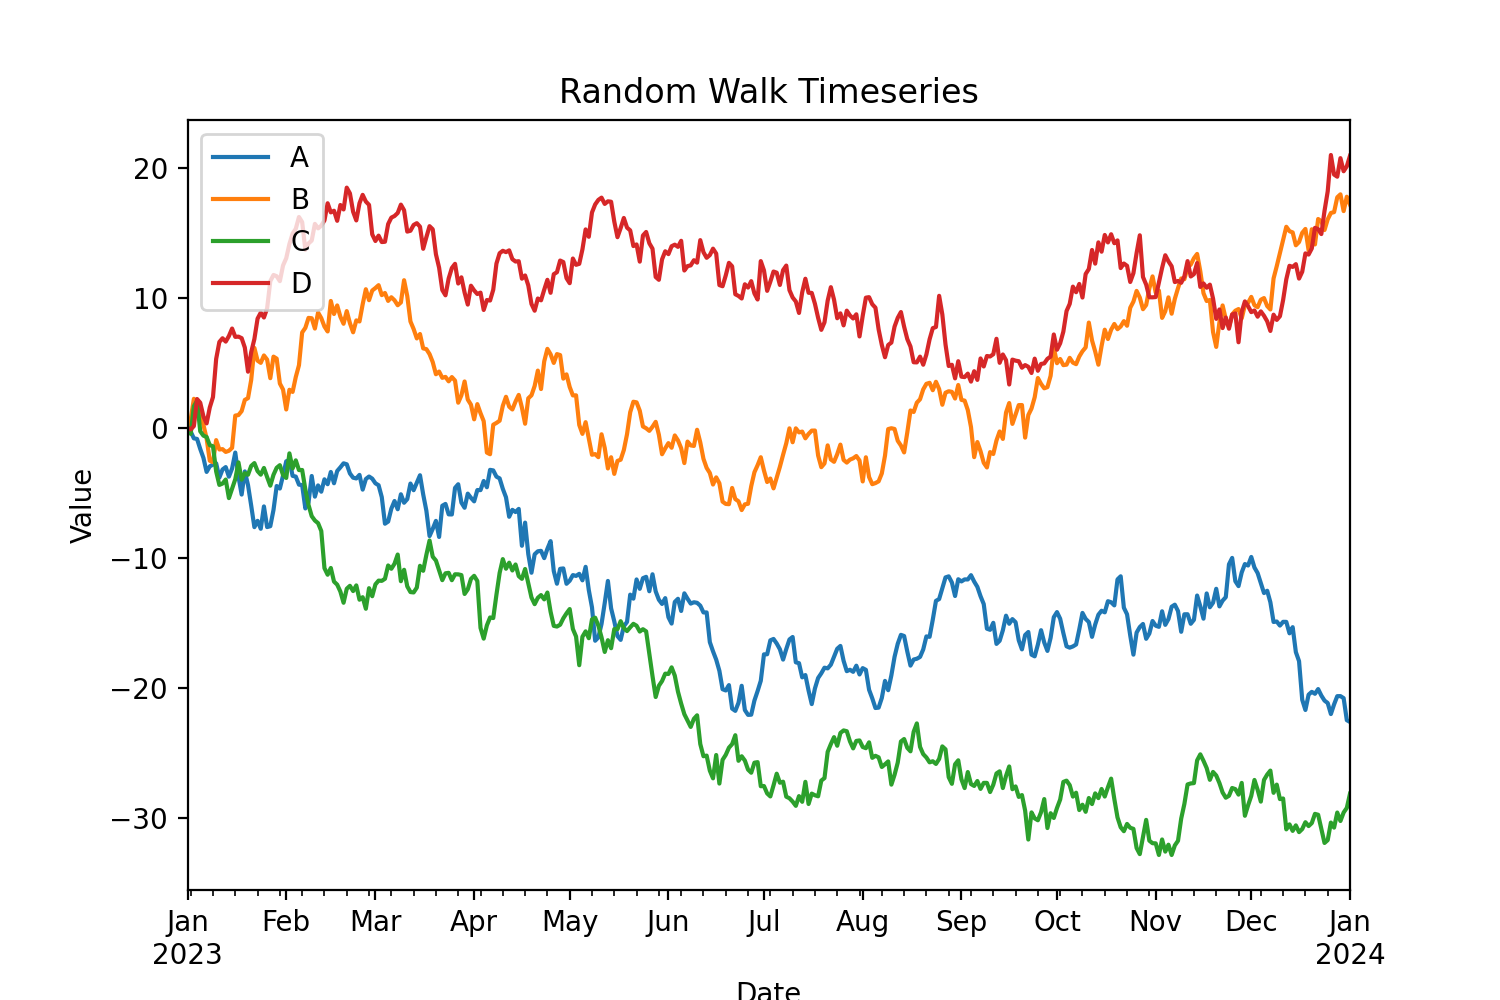

In [51]:
ts_pivot = ts.pivot(index='time', columns='cat', values='value')
fig, ax = plt.subplots(figsize=(7.5, 5))

ts_pivot.plot(ax=ax)

ax.set(xlabel='Date', ylabel='Value', title='Random Walk Timeseries')
ax.legend(loc=2)

plt.show()
plt.savefig('images/ts_mpl.png')

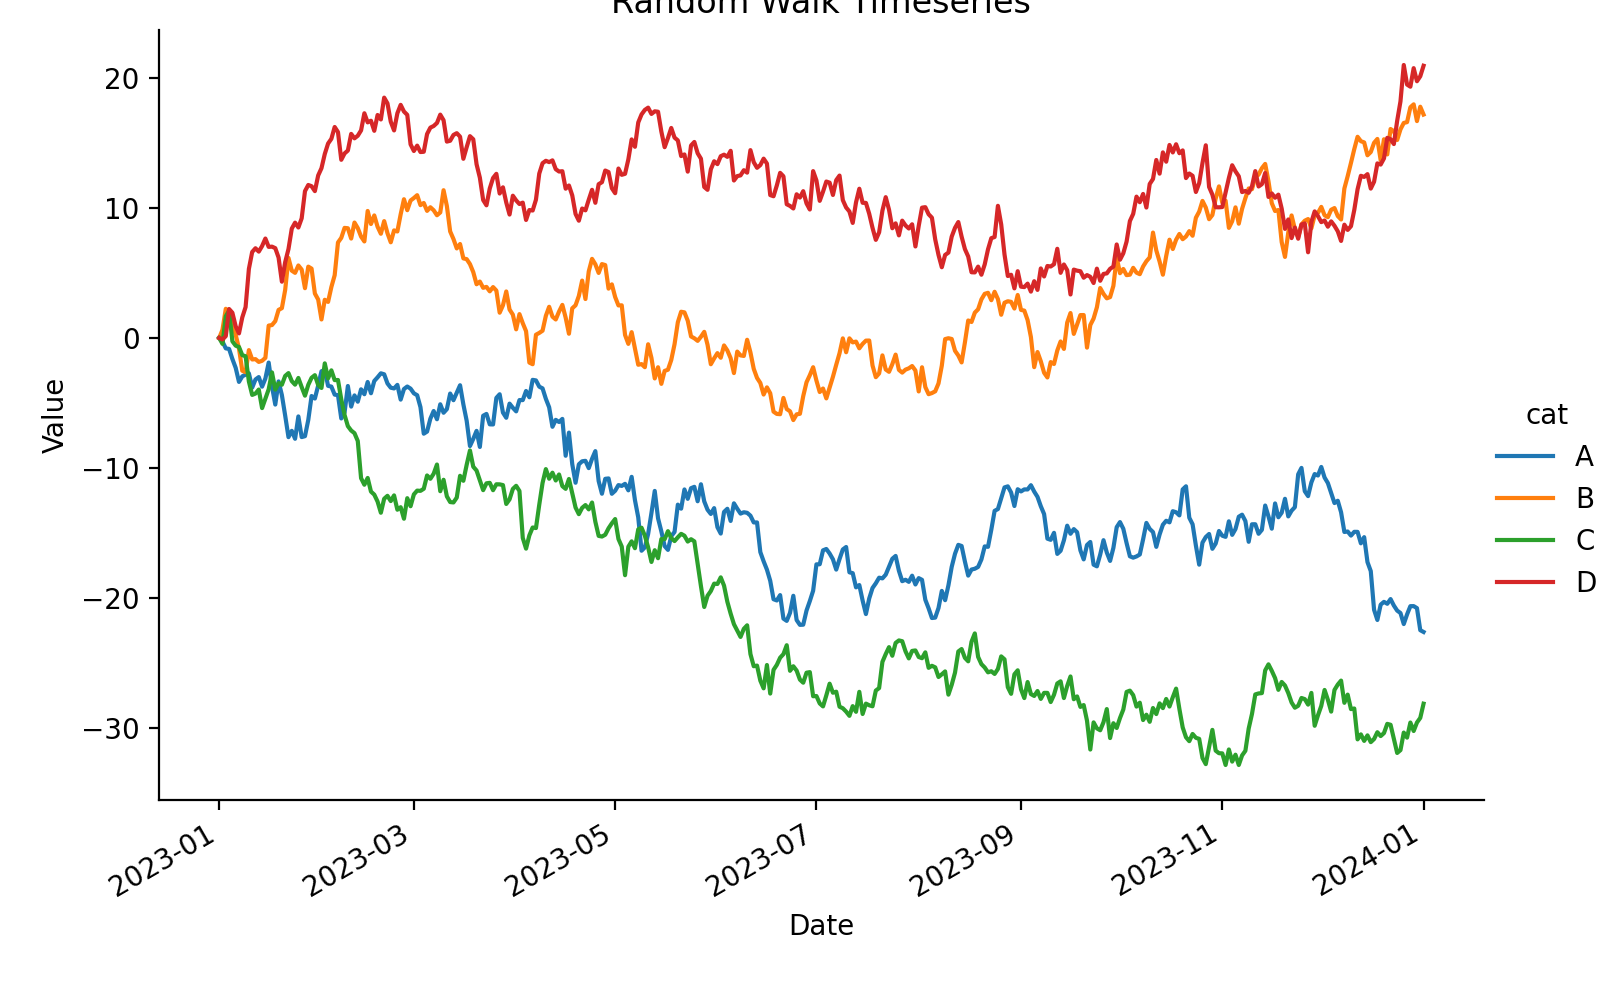

In [54]:
# Seaborn
g = sns.FacetGrid(ts, hue='cat', height=5, aspect=1.5)
g.map(plt.plot, 'time', 'value')
g.ax.set(xlabel='Date',
         ylabel='Value',
         title='Random Walk Timeseries')
g.add_legend()
g.fig.autofmt_xdate()
plt.savefig('images/ts_seaborn.png')

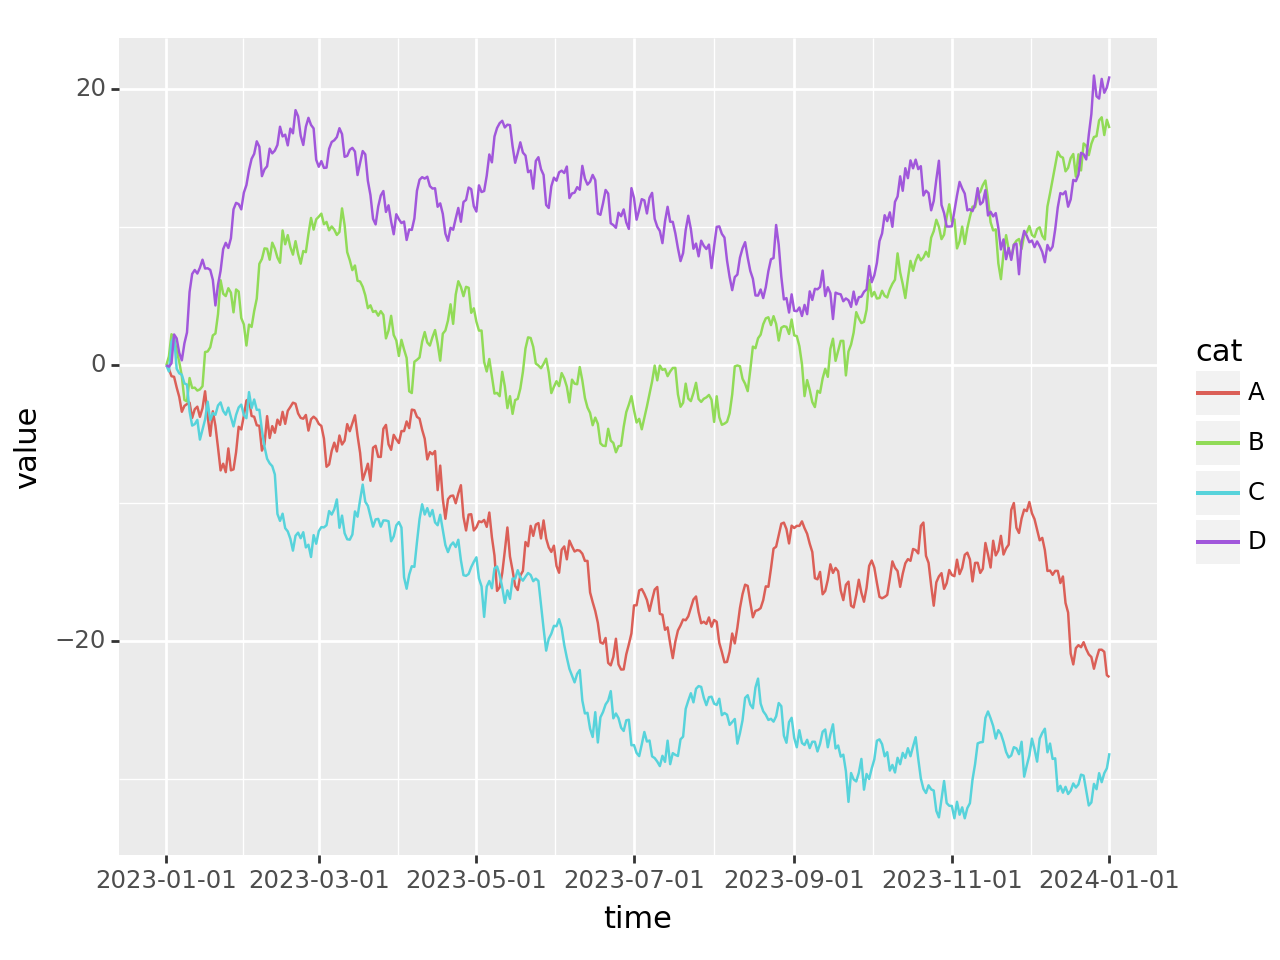

<Figure Size: (640 x 480)>

In [55]:
(ggplot(ts, aes(x='time', y='value', group='cat', color='cat')) \
+ geom_line() \
+ scale_x_datetime())

In [56]:
#altair
alt.Chart(ts).mark_line().encode(
    x=alt.X('time:T').title('Date'),
    y=alt.Y('value').title('Value'),
    color=alt.Color('cat').title('Category'),
    tooltip=['value']
).properties(title='Random Walk Timeseries', width=600, height=400)

alt.Chart(...)